Ariq  Rasya Eka Maulana
E12.2022.01684

In [40]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
import sys

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier

In [41]:
sys.path.append('D:\\kuliah\\folder kuliah_AriqRasyaEkaMaulana\\ProKom_Ariq\\Data Mining and Big Data')
pd.set_option("display.max_columns", None)
pd.set_option("display.expand_frame_repr", False)

In [42]:
dataset =pd.read_csv('D:\\kuliah\\folder kuliah_AriqRasyaEkaMaulana\\ProKom_Ariq\\Data Mining and Big Data\\cirrhosis.csv', sep=',')

In [43]:
dataset

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [45]:
# prompt: Using dataframe dataset: I want to create code that can make NaN as Number and alpha following the data in their current column

# Iterate through each column in the DataFrame
for column in dataset.columns:
    # Check if the column's data type is numeric
    if pd.api.types.is_numeric_dtype(dataset[column]):
        # Fill NaN values with the mean of the column
        dataset[column] = dataset[column].fillna(dataset[column].median())
    else:
        # Fill NaN values with the mode of the column for non-numeric columns
        dataset[column] = dataset[column].fillna(dataset[column].mode()[0])

In [46]:
dataset

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,D-penicillamine,24472,F,N,Y,N,N,1.2,309.5,2.96,73.0,1259.0,114.70,108.0,174.0,10.9,3.0
414,415,1103,C,D-penicillamine,14245,F,N,Y,N,N,0.9,309.5,3.83,73.0,1259.0,114.70,108.0,180.0,11.2,4.0
415,416,1055,C,D-penicillamine,20819,F,N,Y,N,N,1.6,309.5,3.42,73.0,1259.0,114.70,108.0,143.0,9.9,3.0
416,417,691,C,D-penicillamine,21185,F,N,Y,N,N,0.8,309.5,3.75,73.0,1259.0,114.70,108.0,269.0,10.4,3.0


In [47]:
dataset.loc[:,list(dataset.loc[:,dataset.isnull().any()].columns)].isnull().sum()/(len(dataset))*100

Series([], dtype: float64)

In [48]:
dataset = dataset.drop_duplicates()

In [49]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           418 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        418 non-null    object 
 7   Hepatomegaly   418 non-null    object 
 8   Spiders        418 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    418 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         418 non-null    float64
 14  Alk_Phos       418 non-null    float64
 15  SGOT           418 non-null    float64
 16  Tryglicerides  418 non-null    float64
 17  Platelets      418 non-null    float64
 18  Prothrombi

In [50]:
dataset = dataset.loc[:,dataset.apply(pd.Series.nunique) != 1]

In [51]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           418 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        418 non-null    object 
 7   Hepatomegaly   418 non-null    object 
 8   Spiders        418 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    418 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         418 non-null    float64
 14  Alk_Phos       418 non-null    float64
 15  SGOT           418 non-null    float64
 16  Tryglicerides  418 non-null    float64
 17  Platelets      418 non-null    float64
 18  Prothrombi

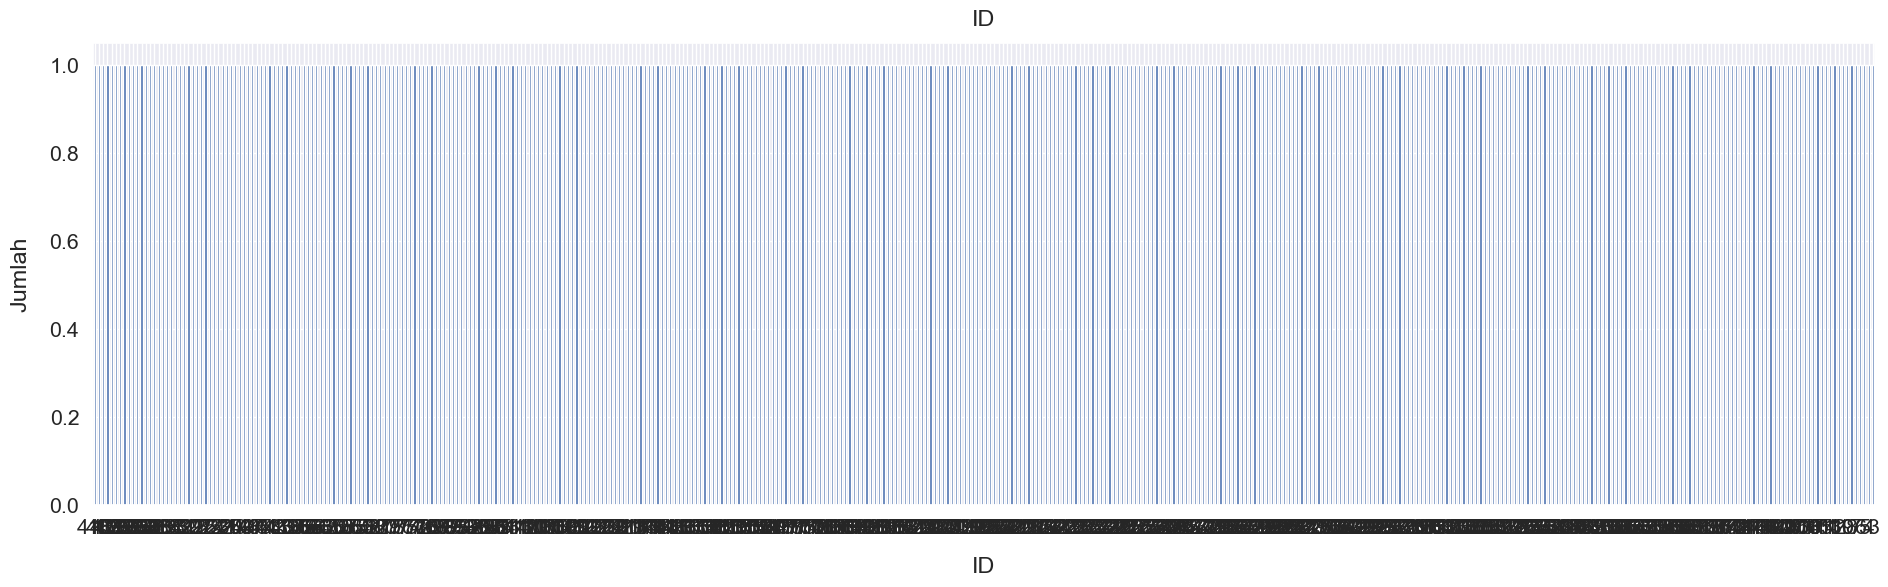

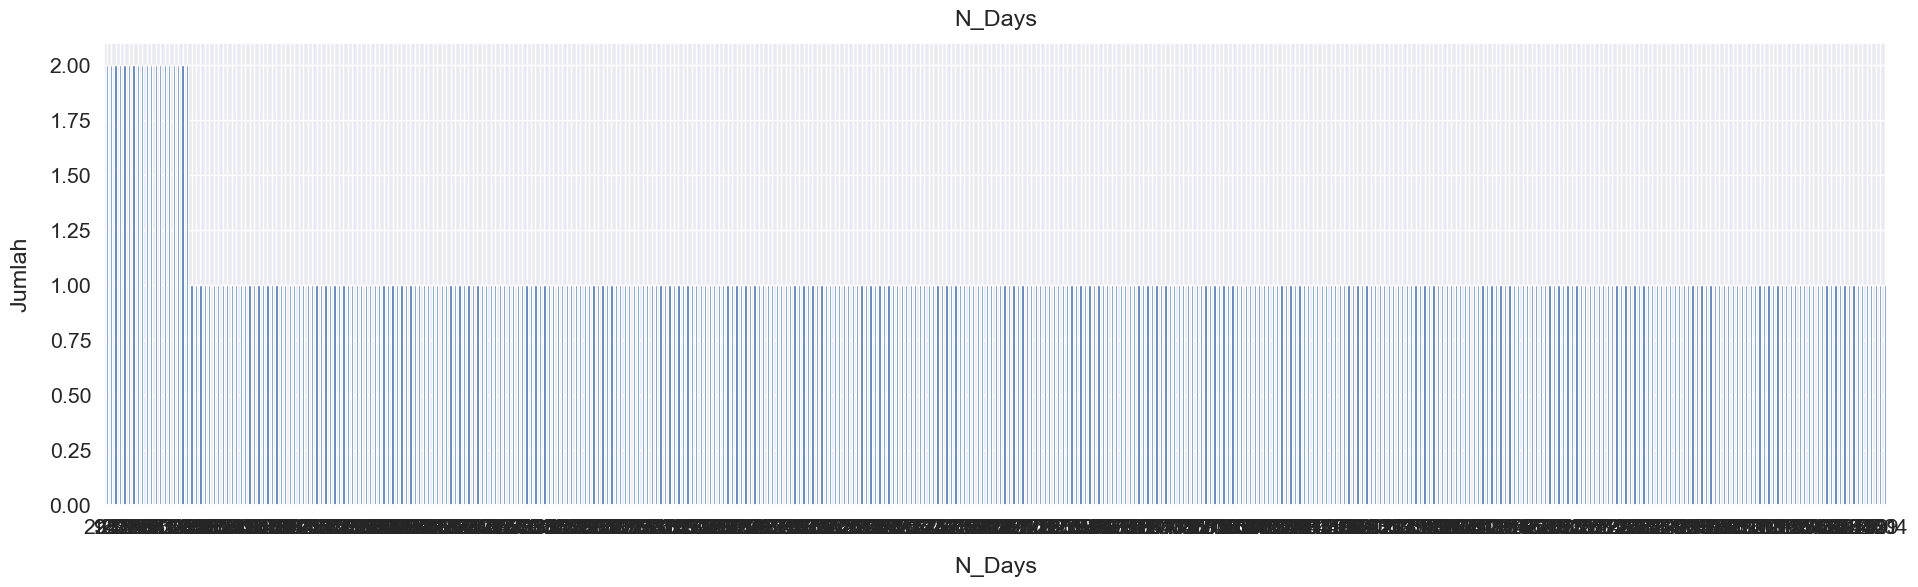

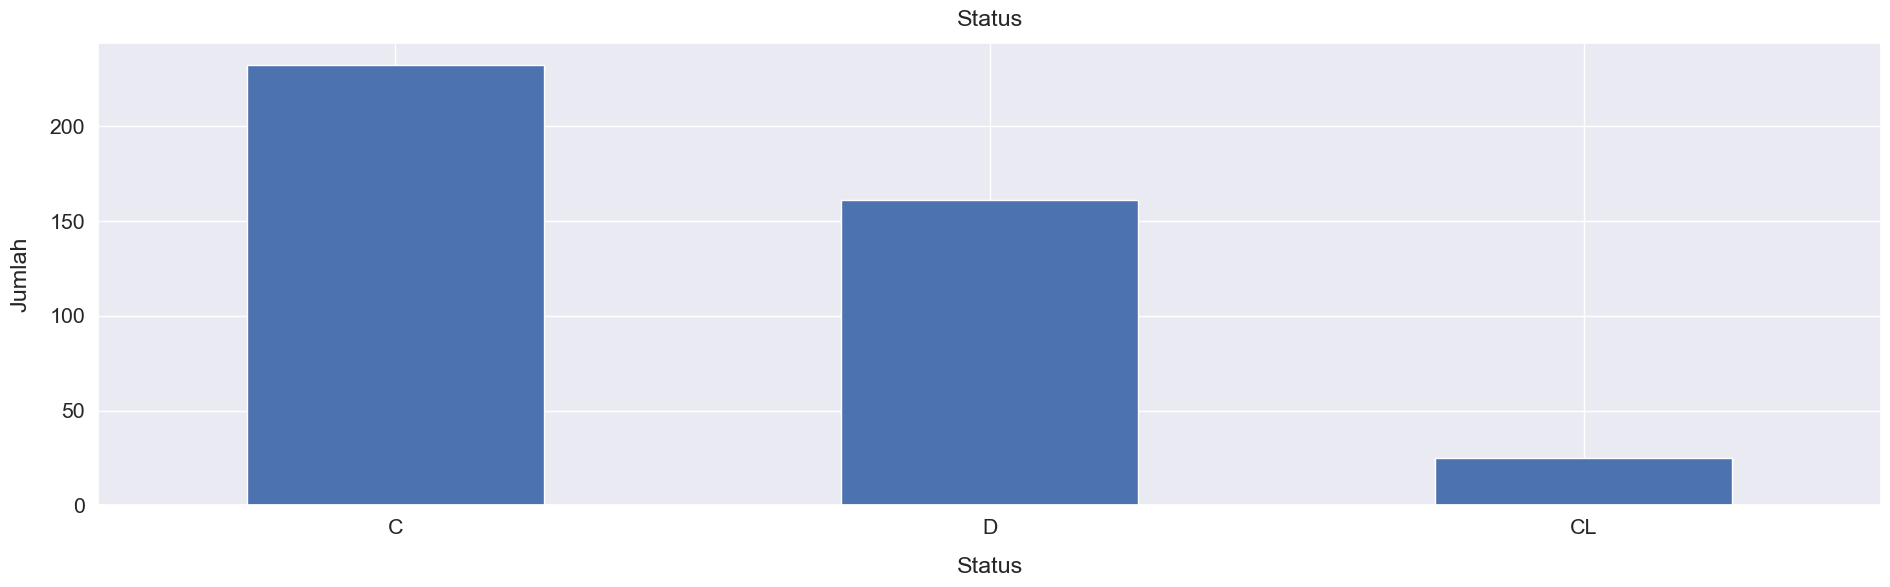

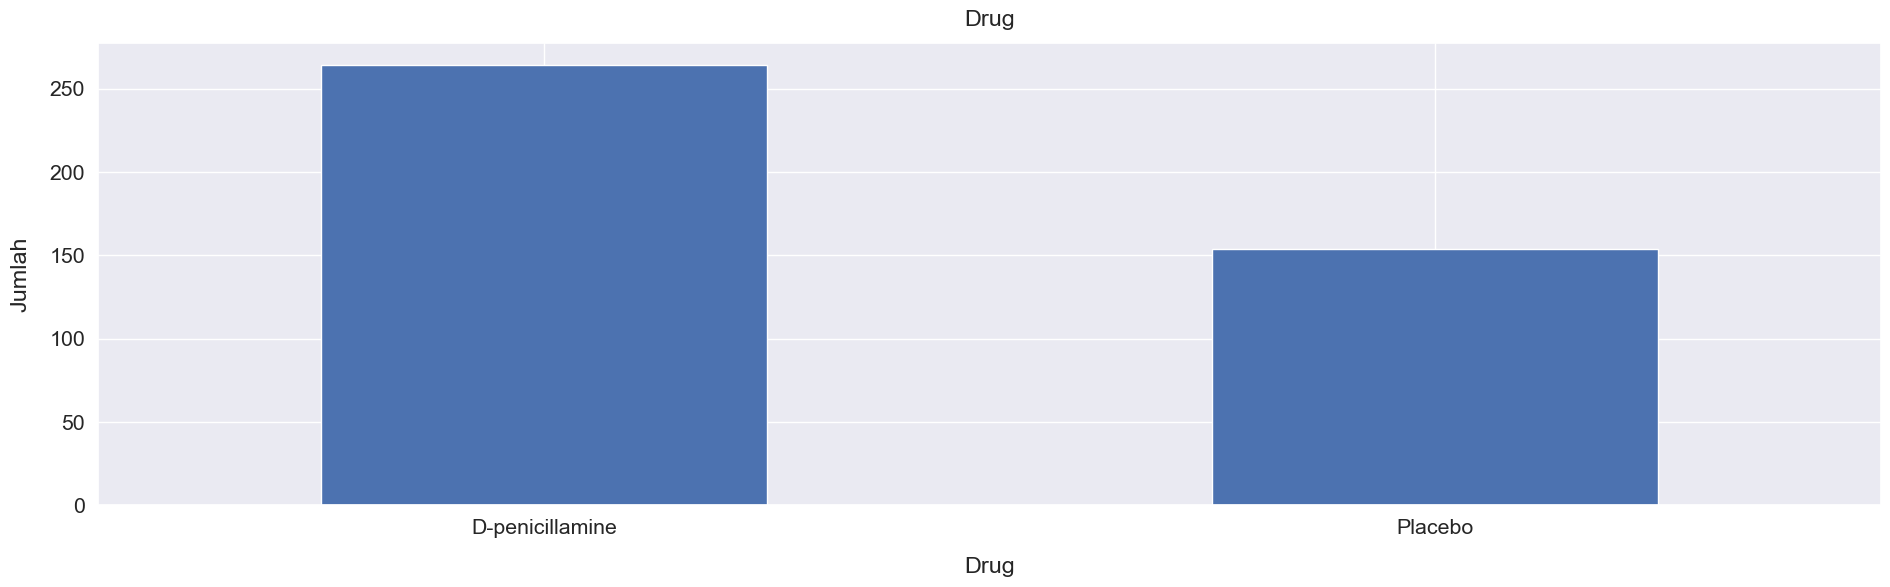

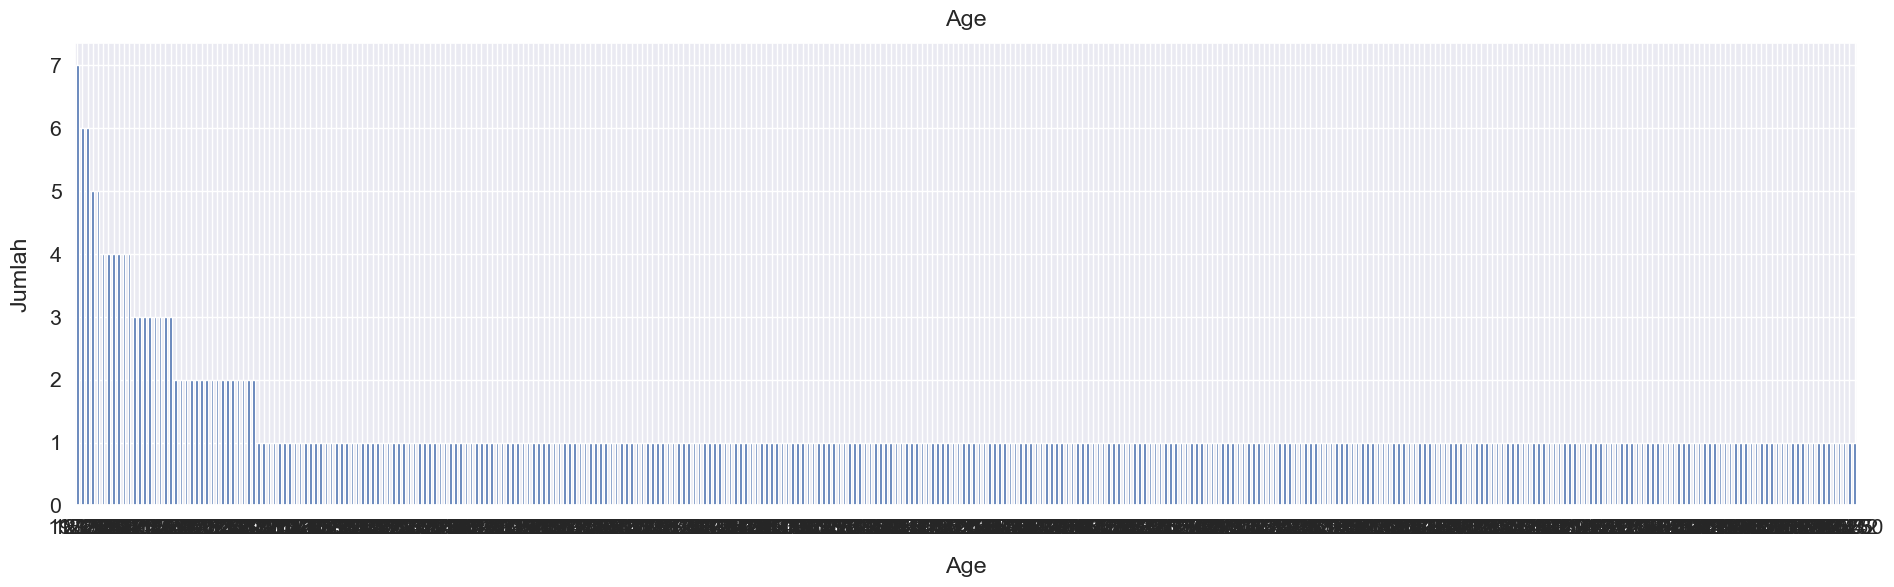

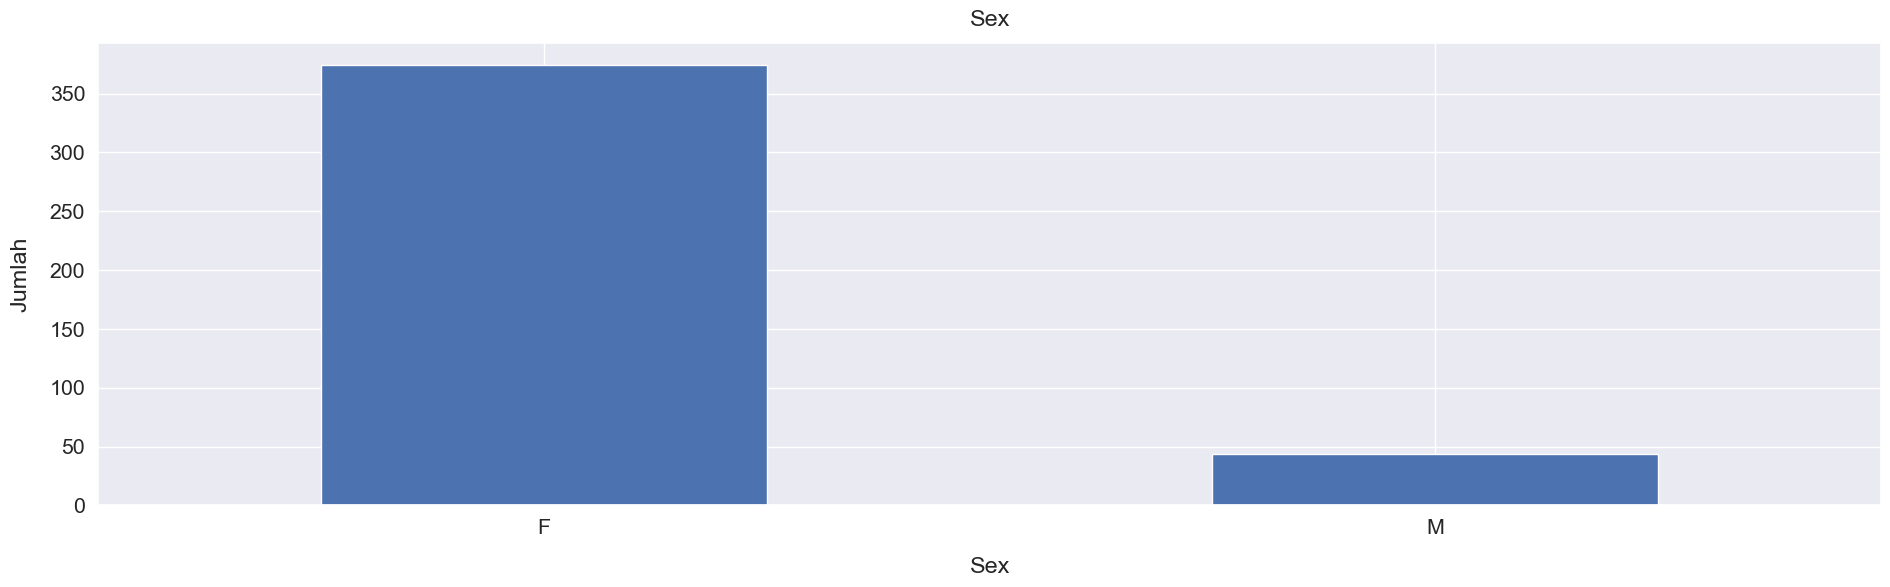

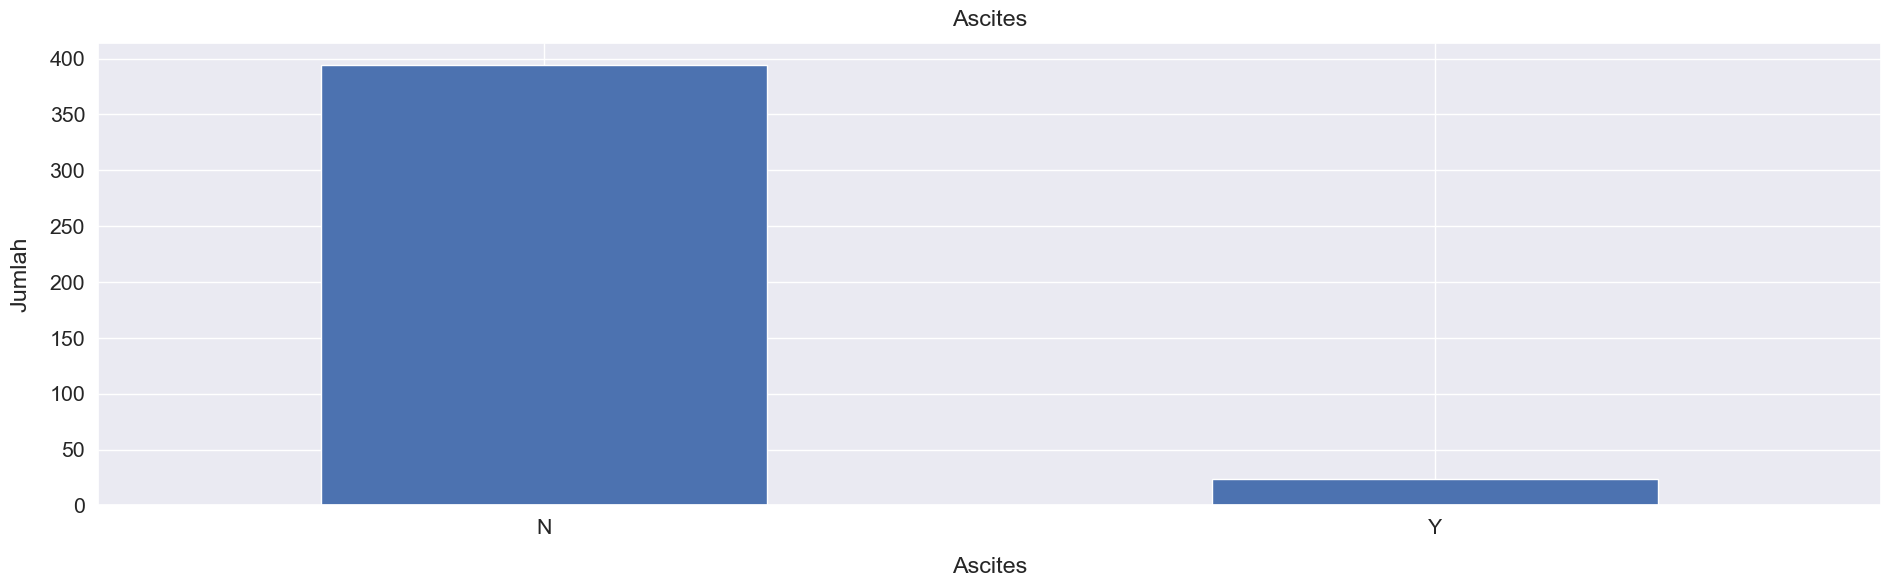

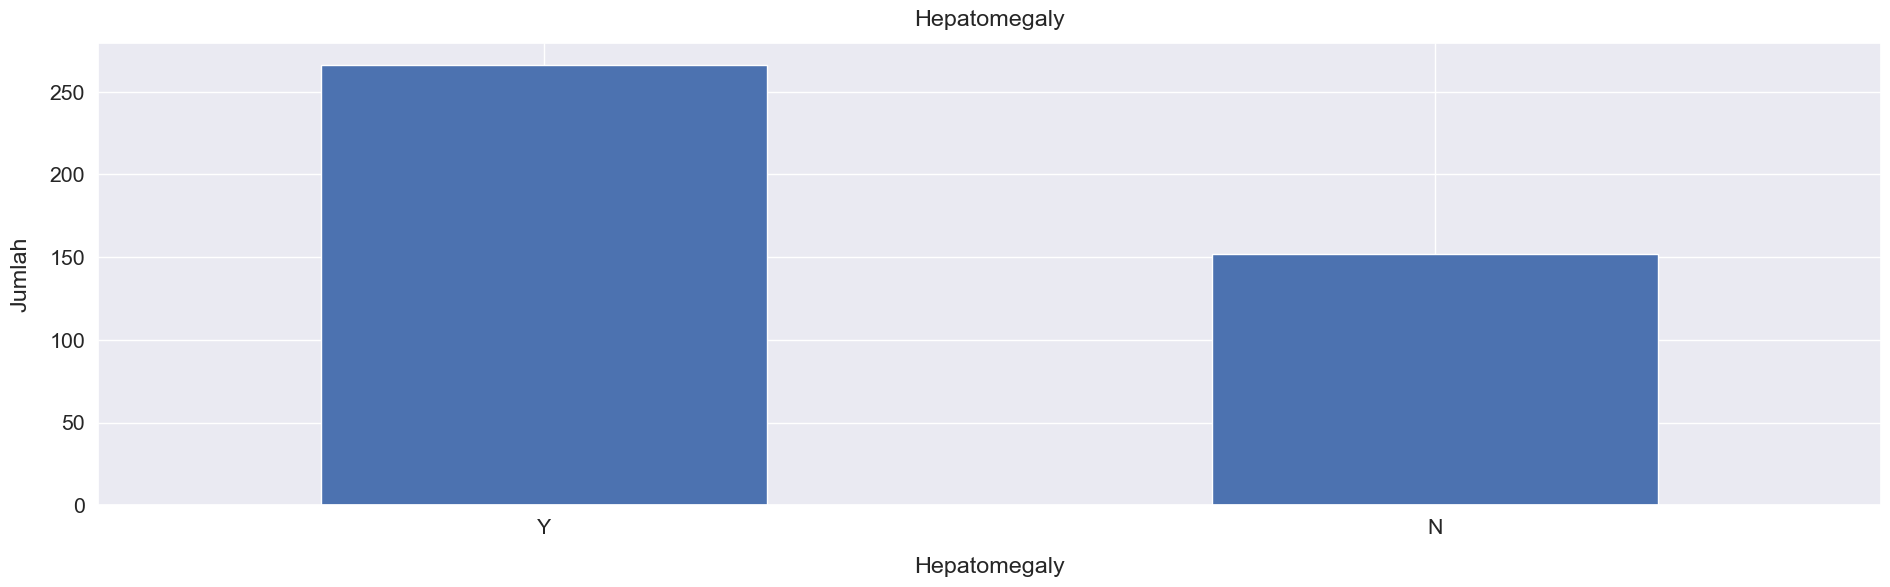

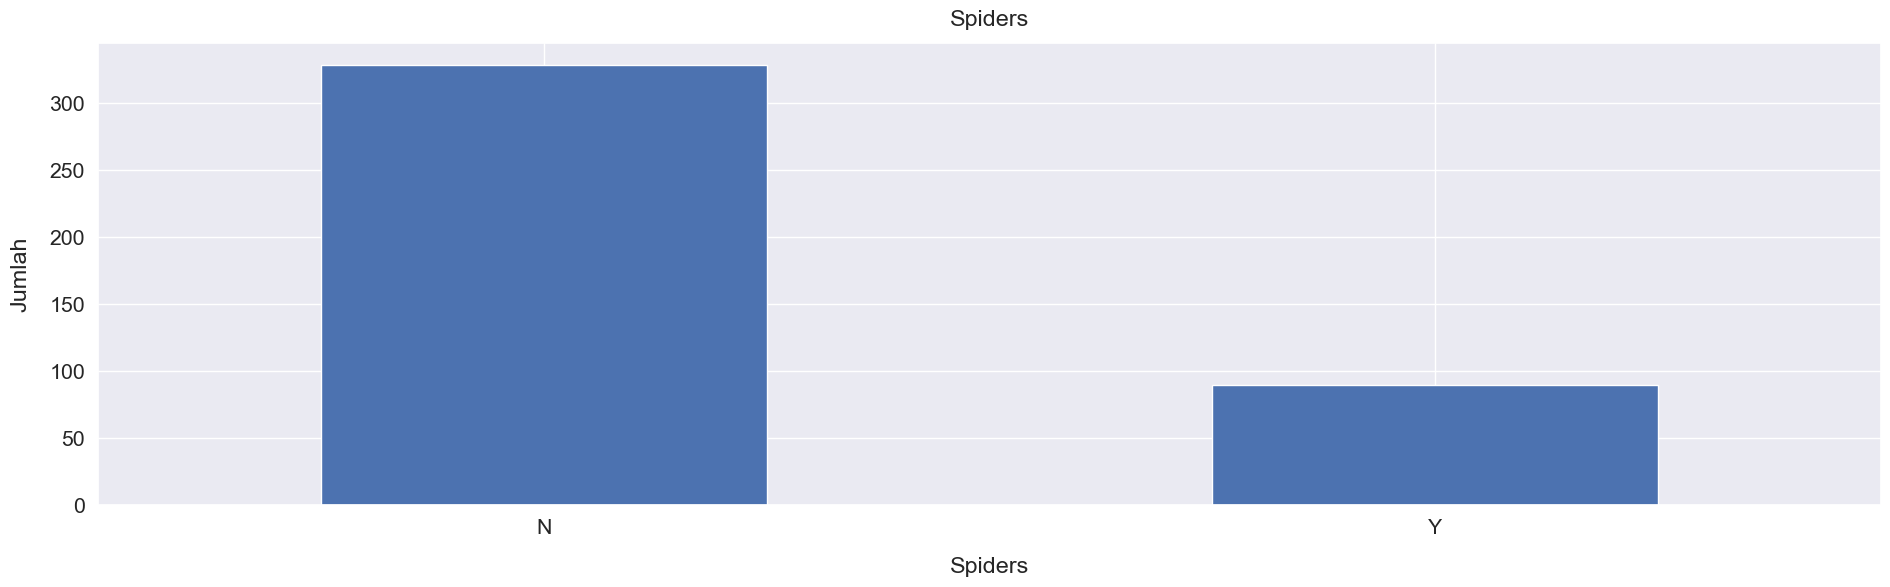

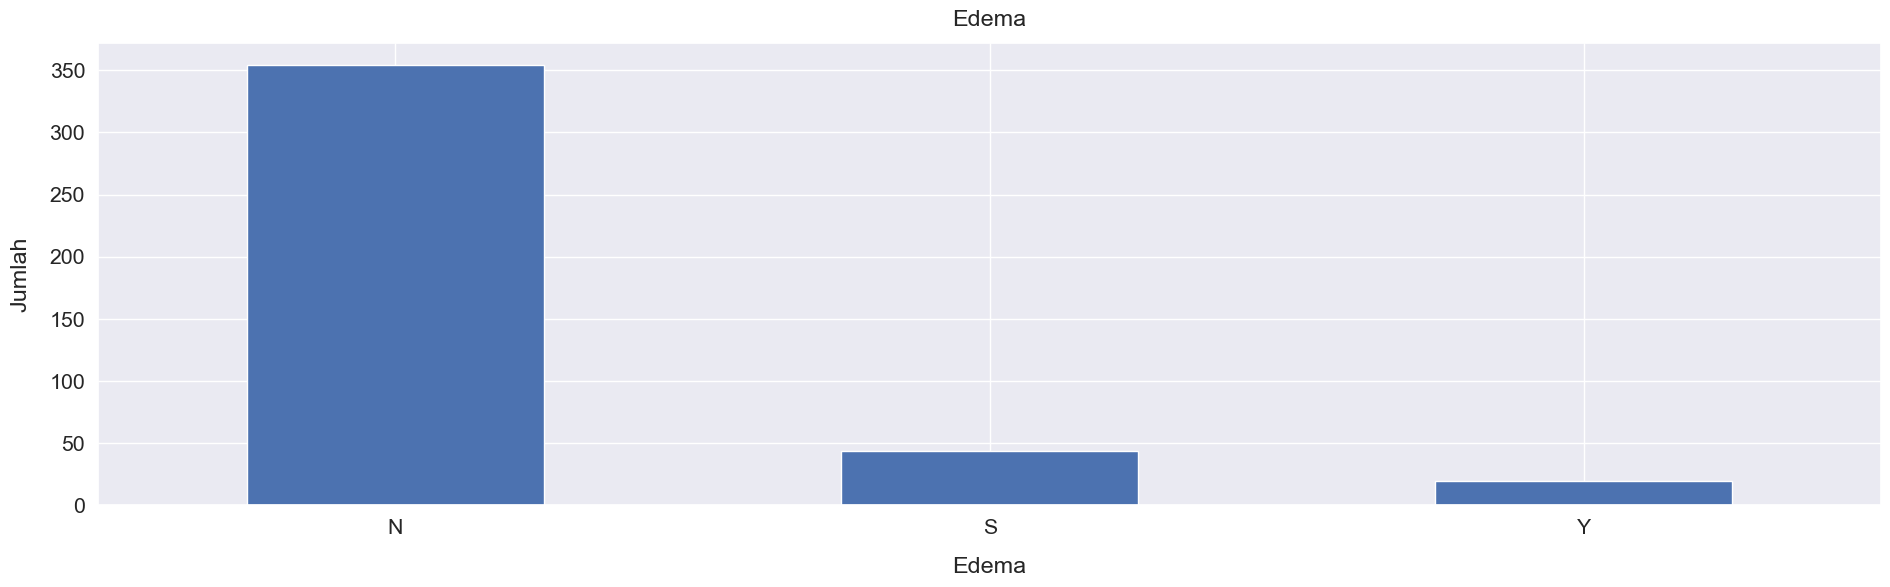

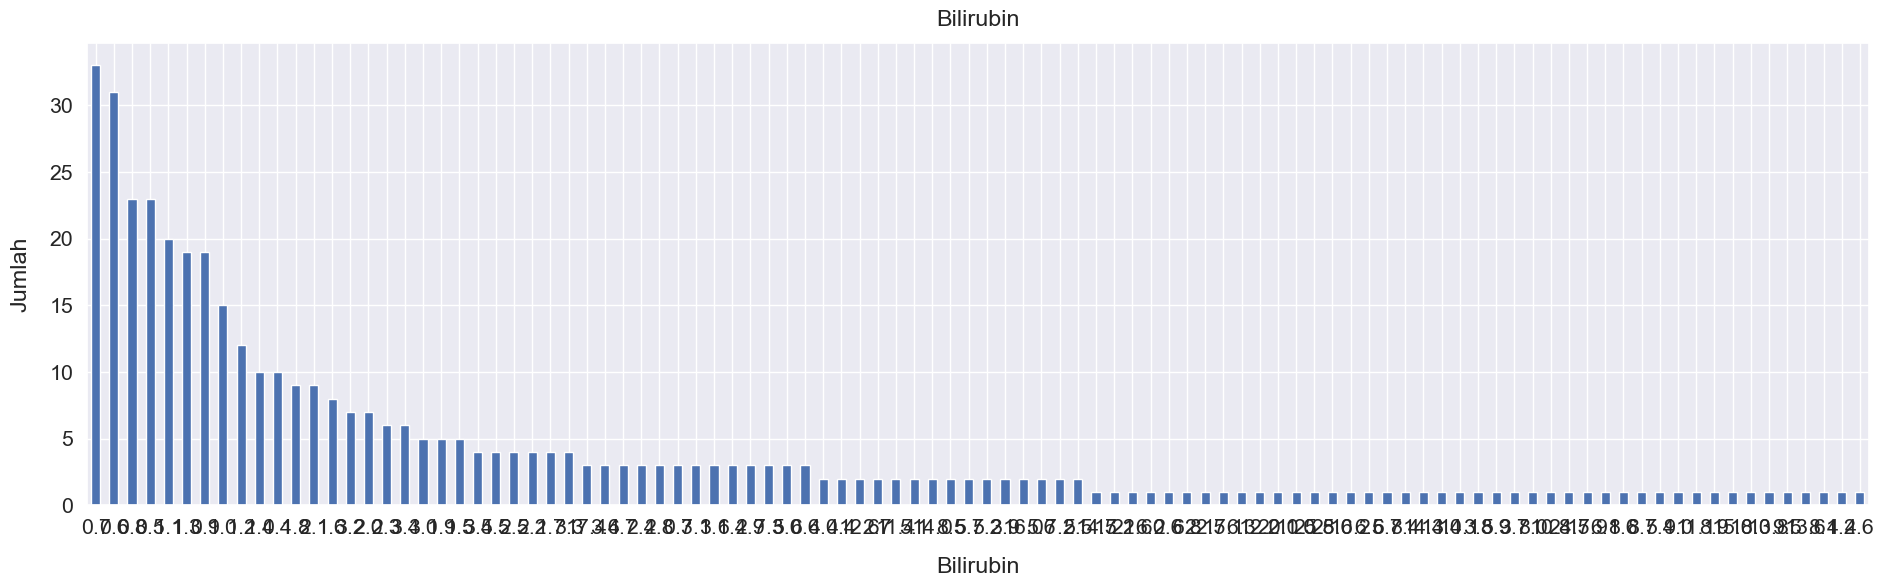

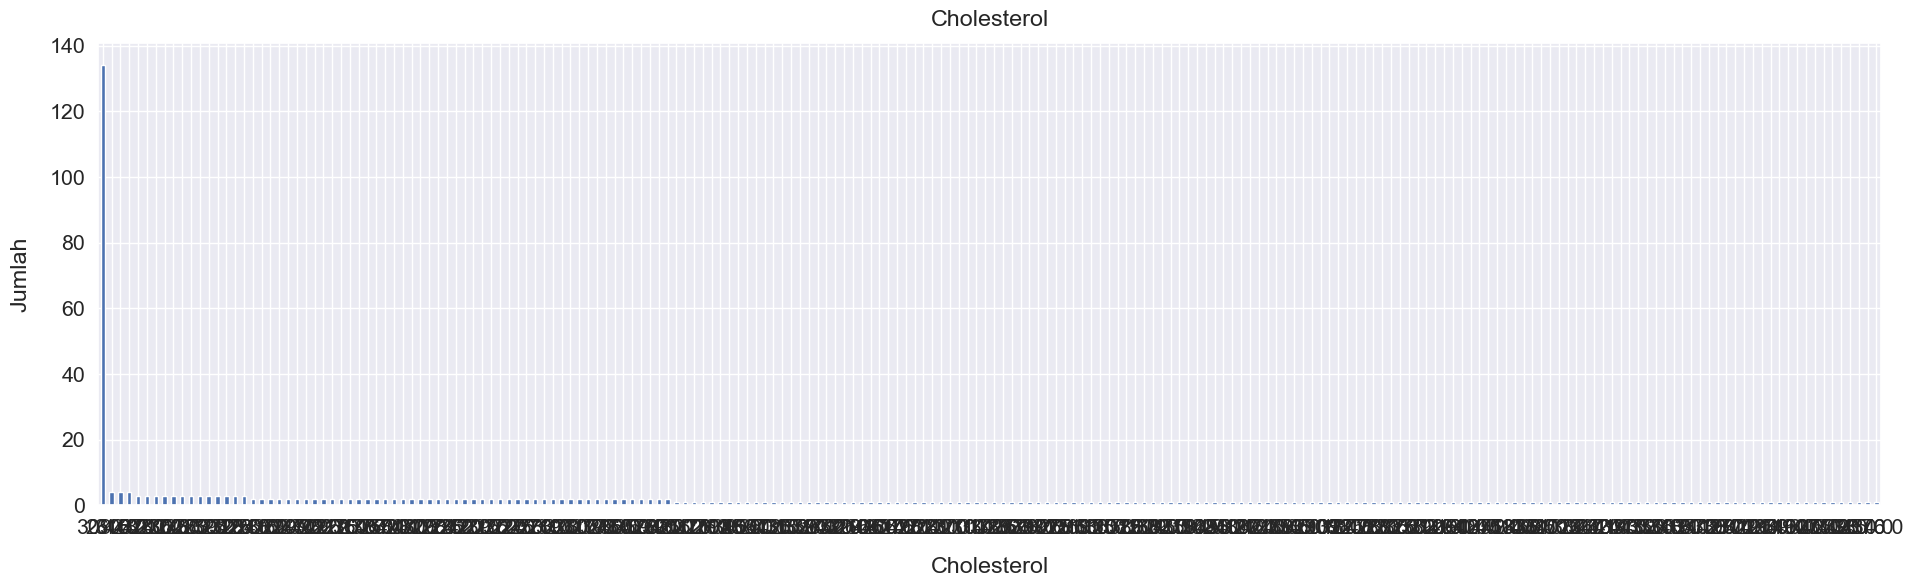

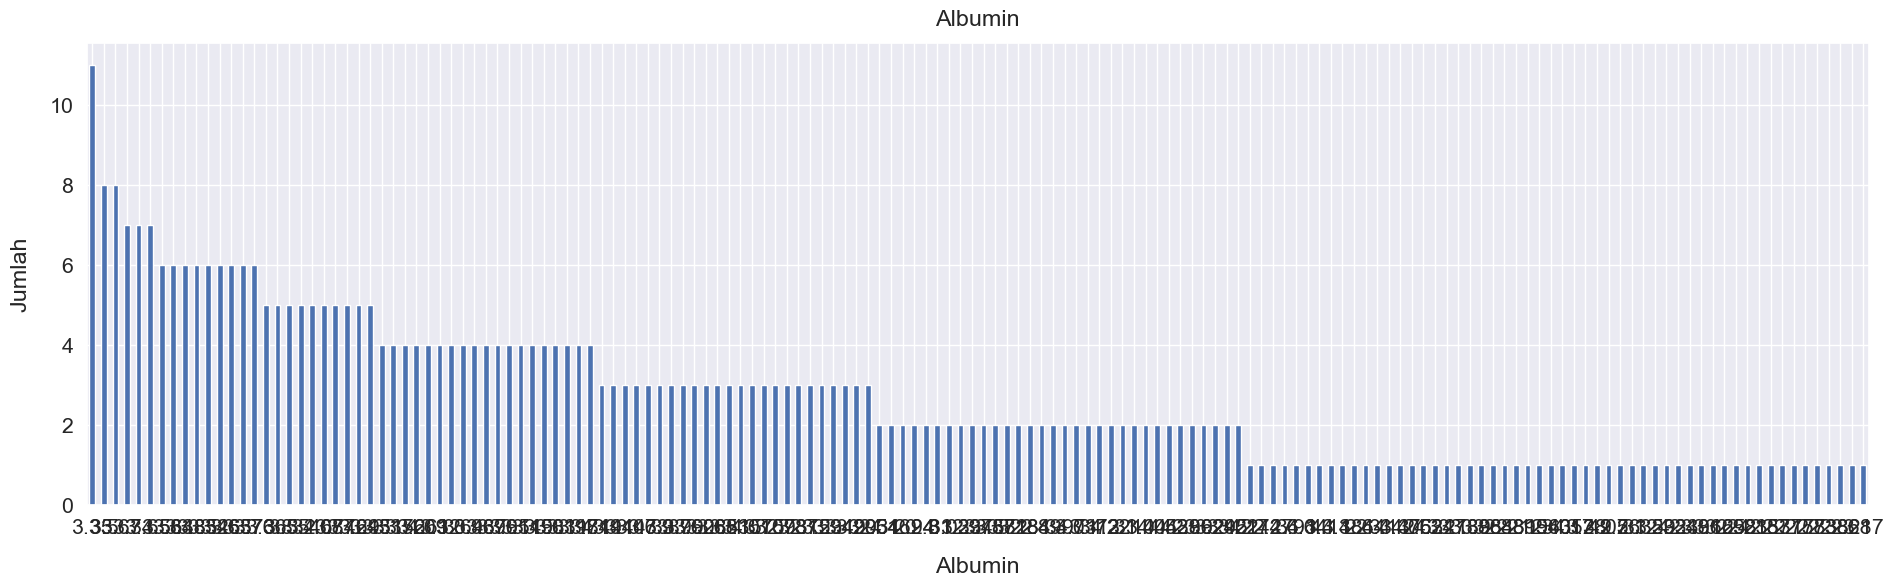

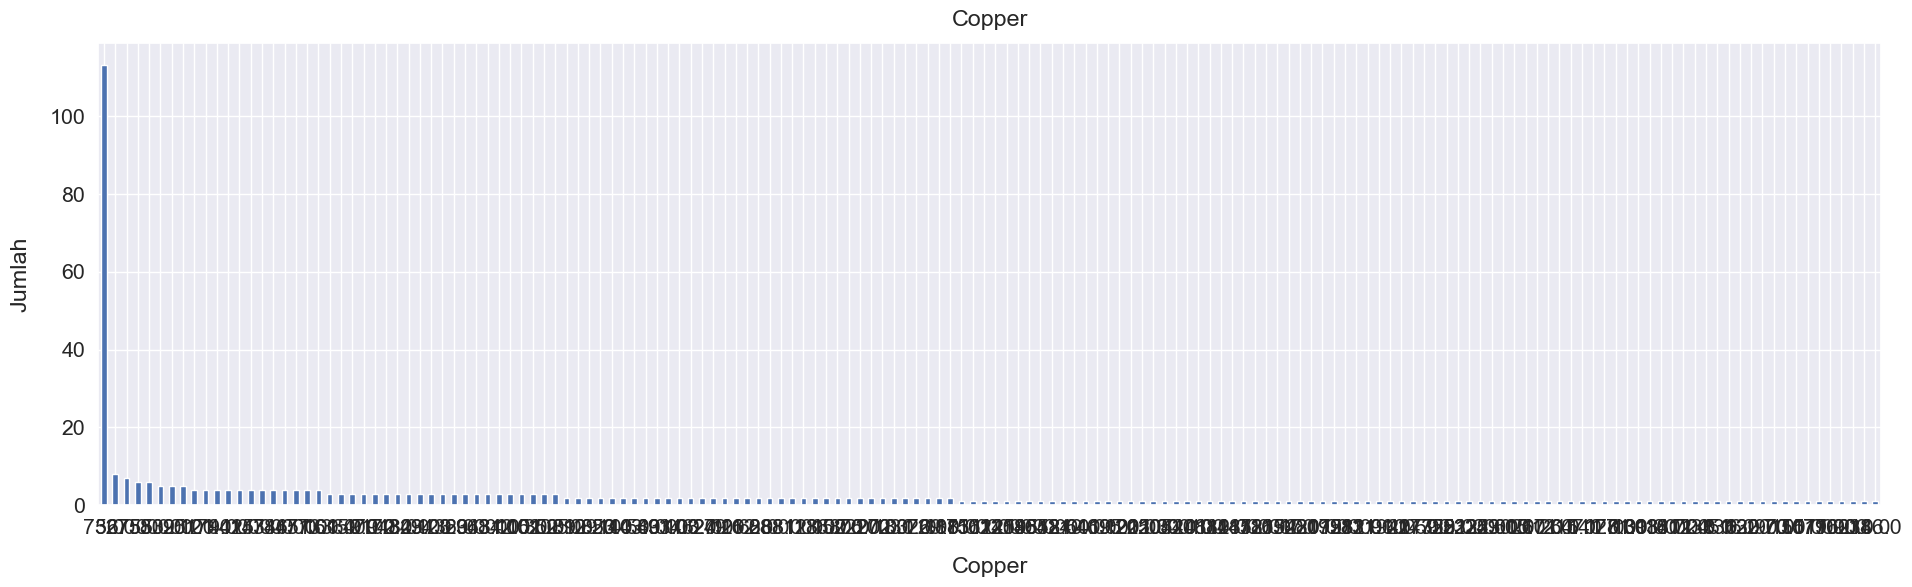

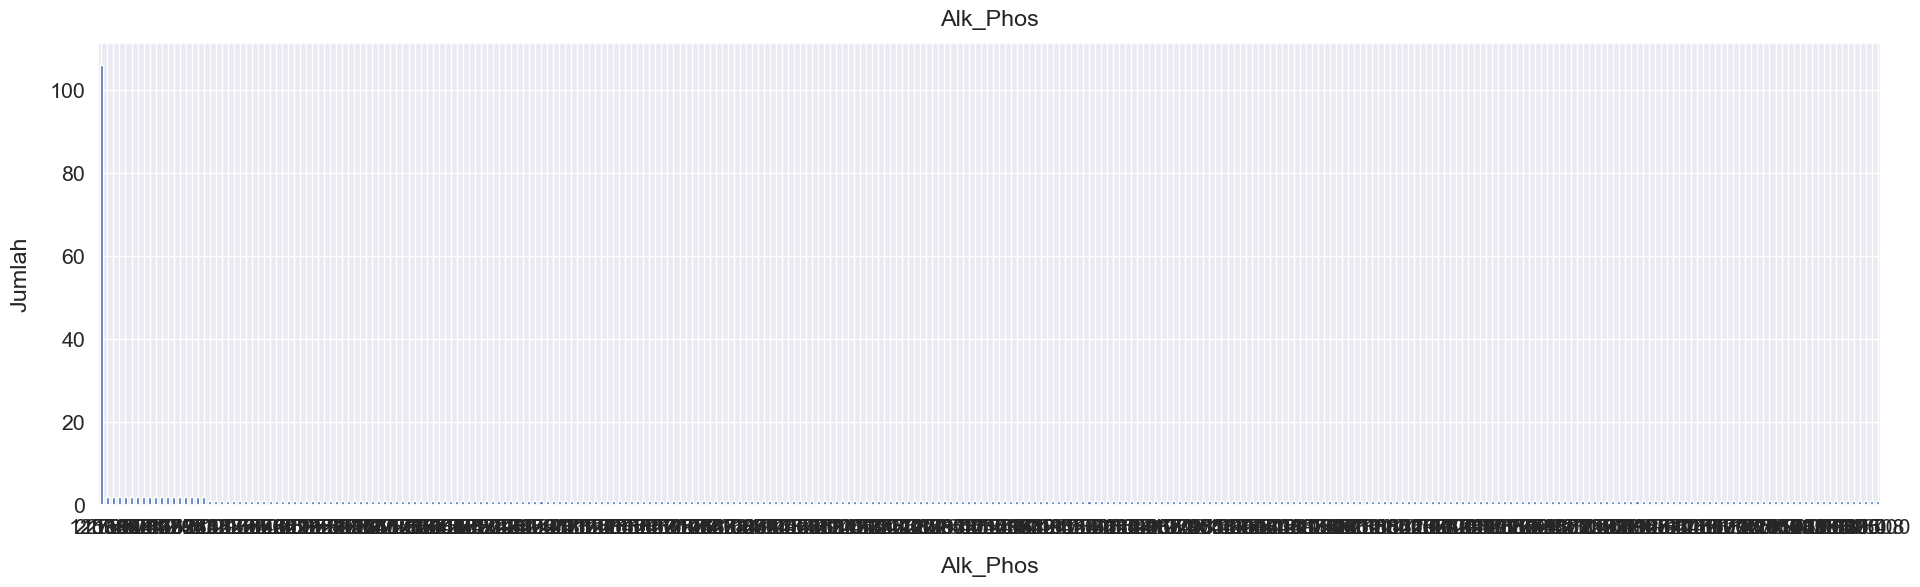

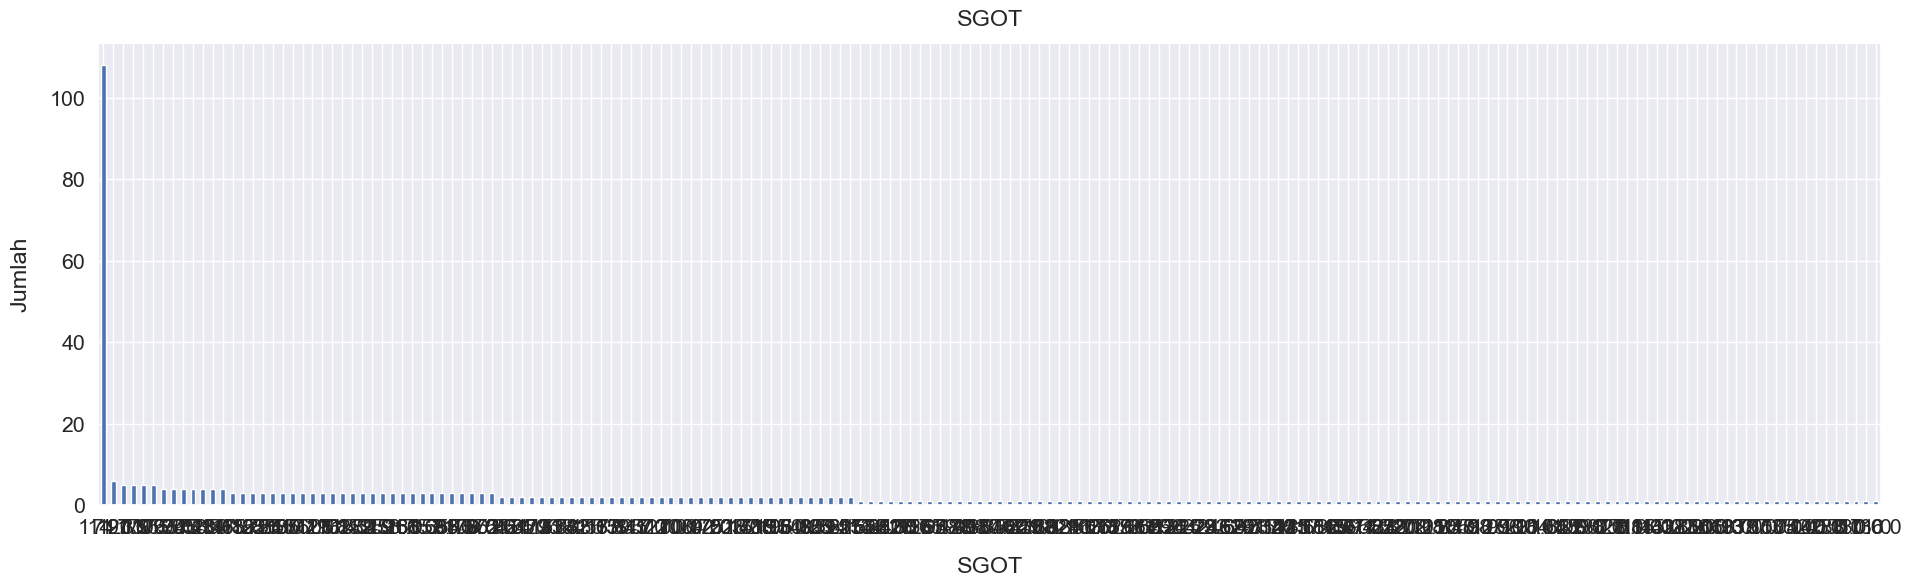

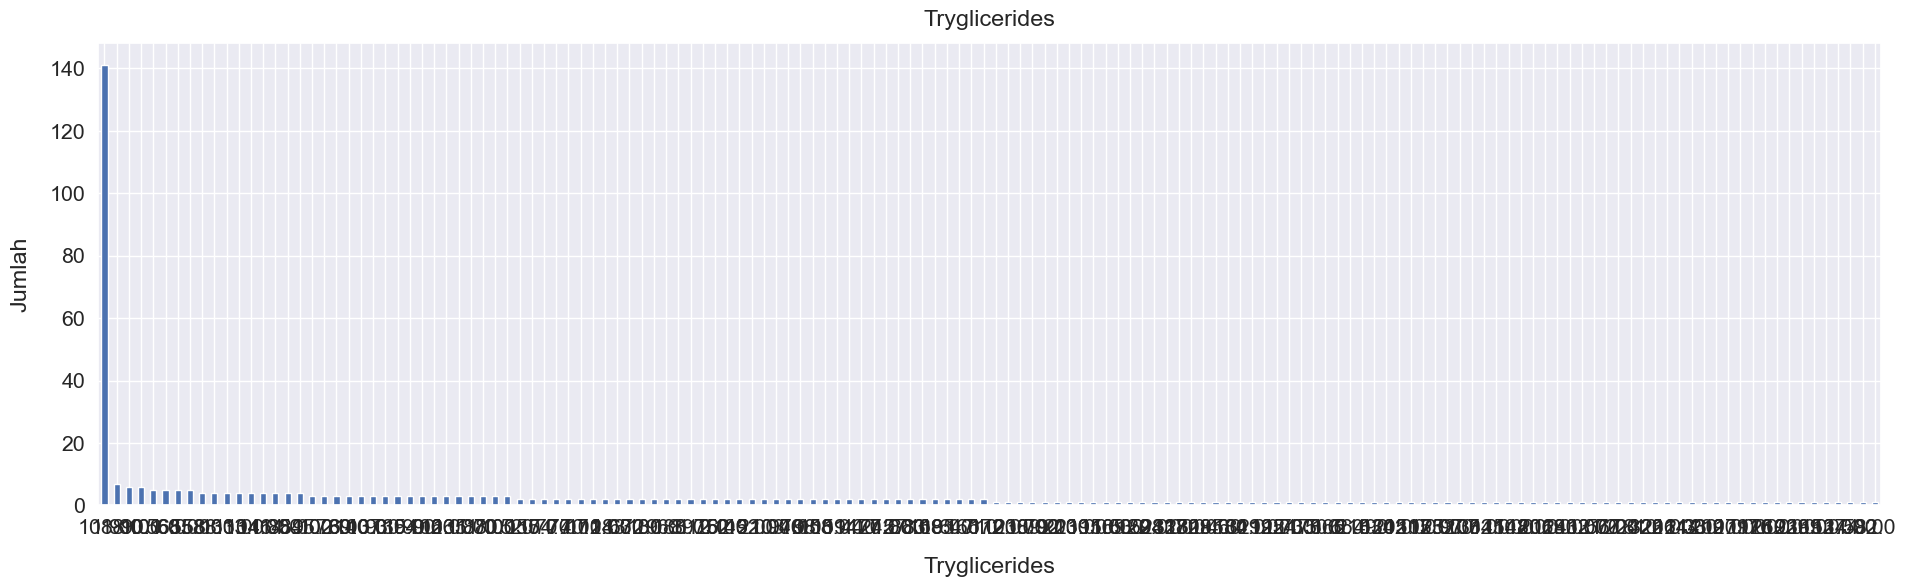

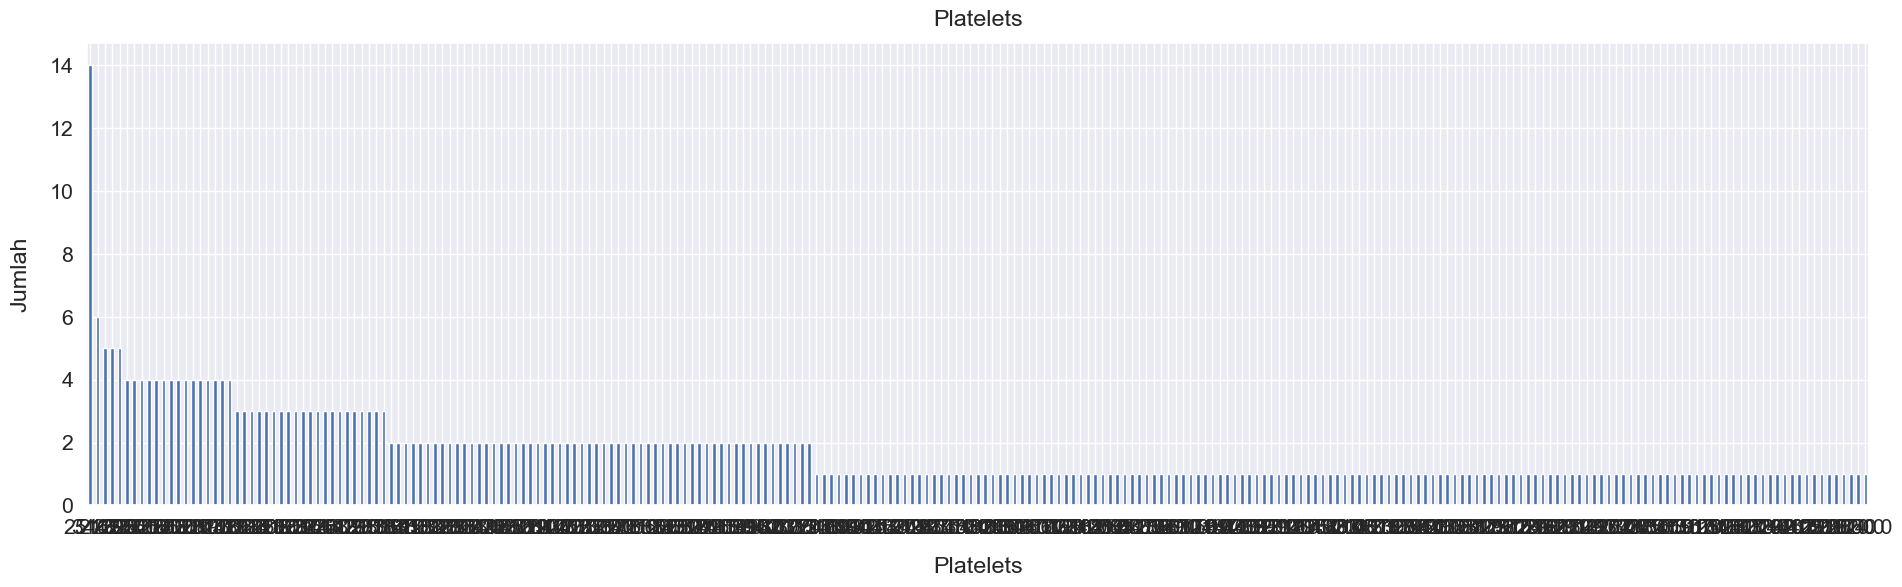

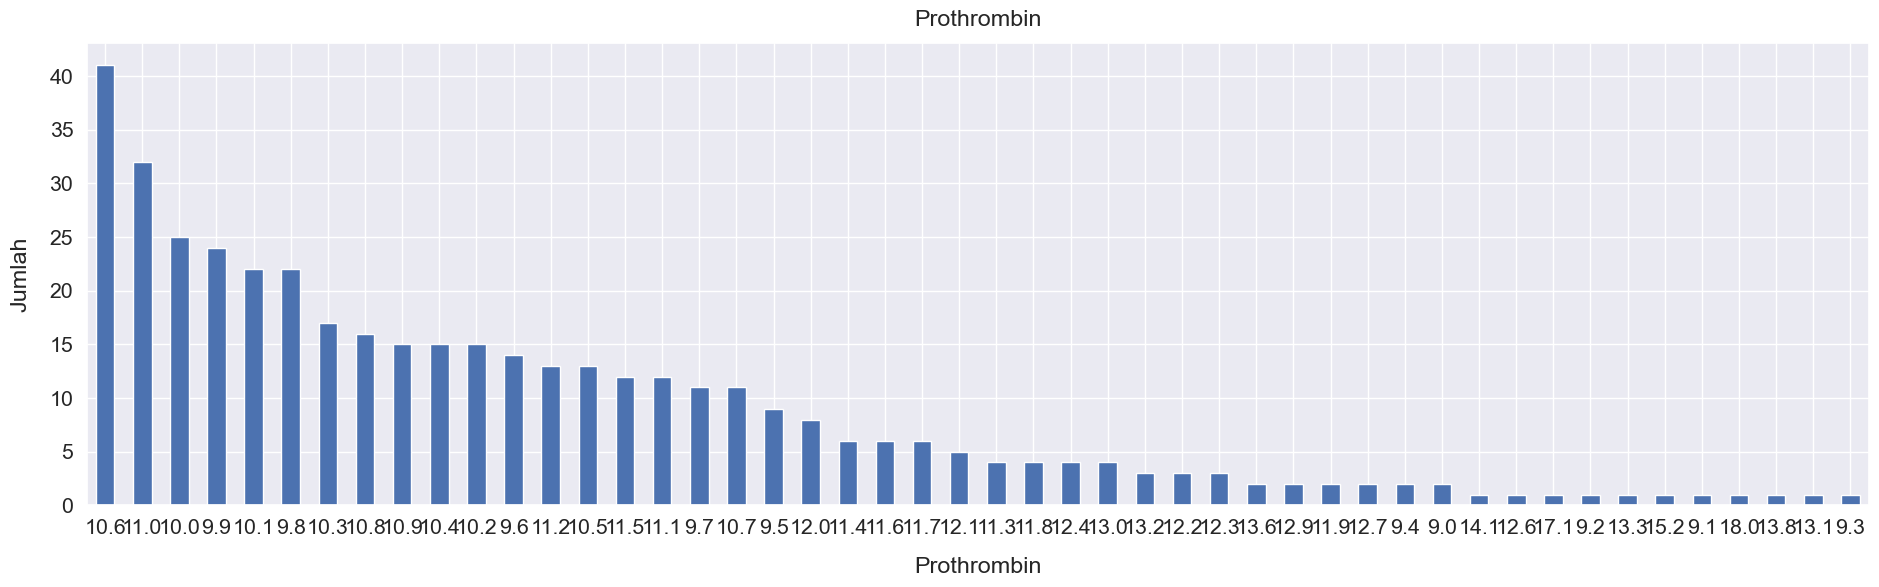

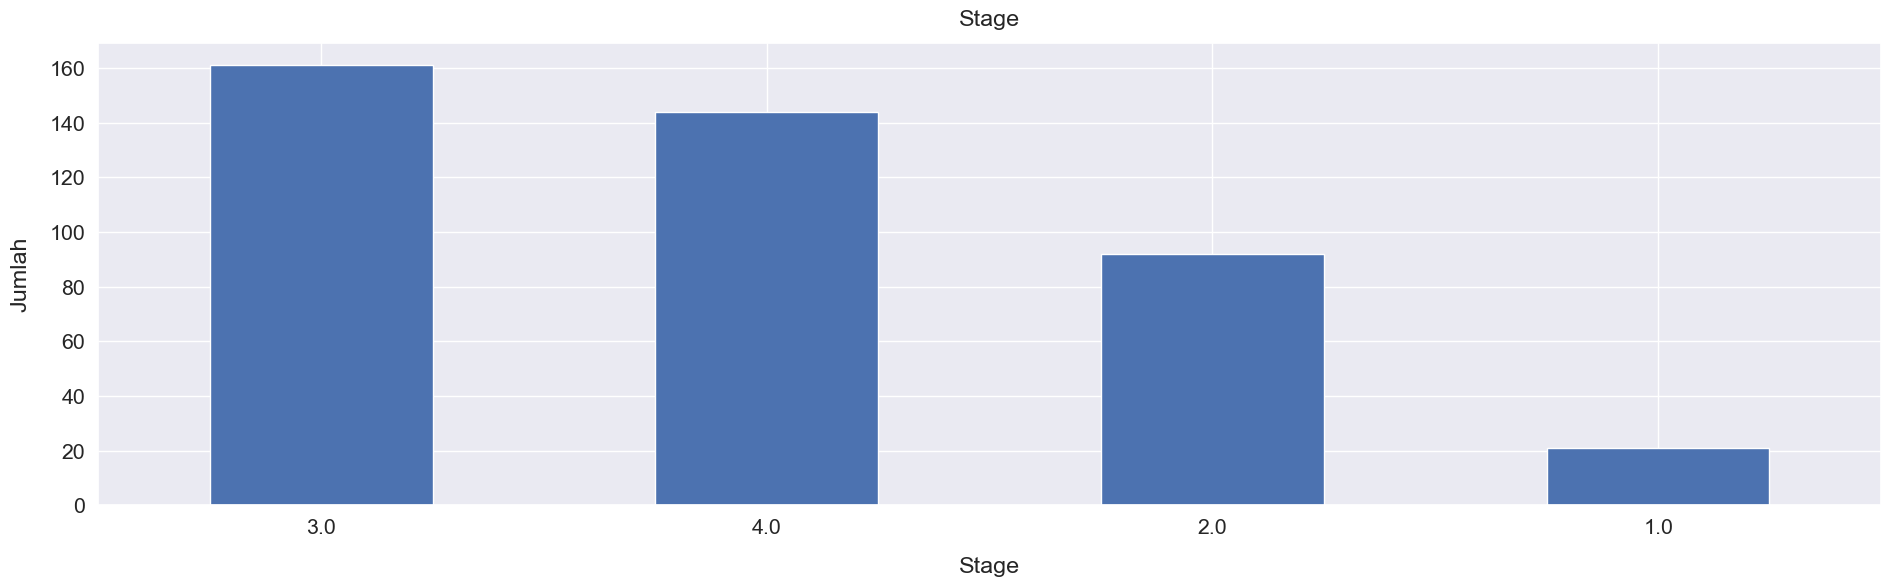

In [52]:
sns.set(font_scale=1.4)
for col in dataset.columns:
  dataset[col].value_counts().plot(kind='bar', figsize=(23, 6), rot=0)
  plt.xlabel(col, labelpad=14)
  plt.ylabel("Jumlah", labelpad=14)
  plt.title(col, y=1.02)
  plt.show()

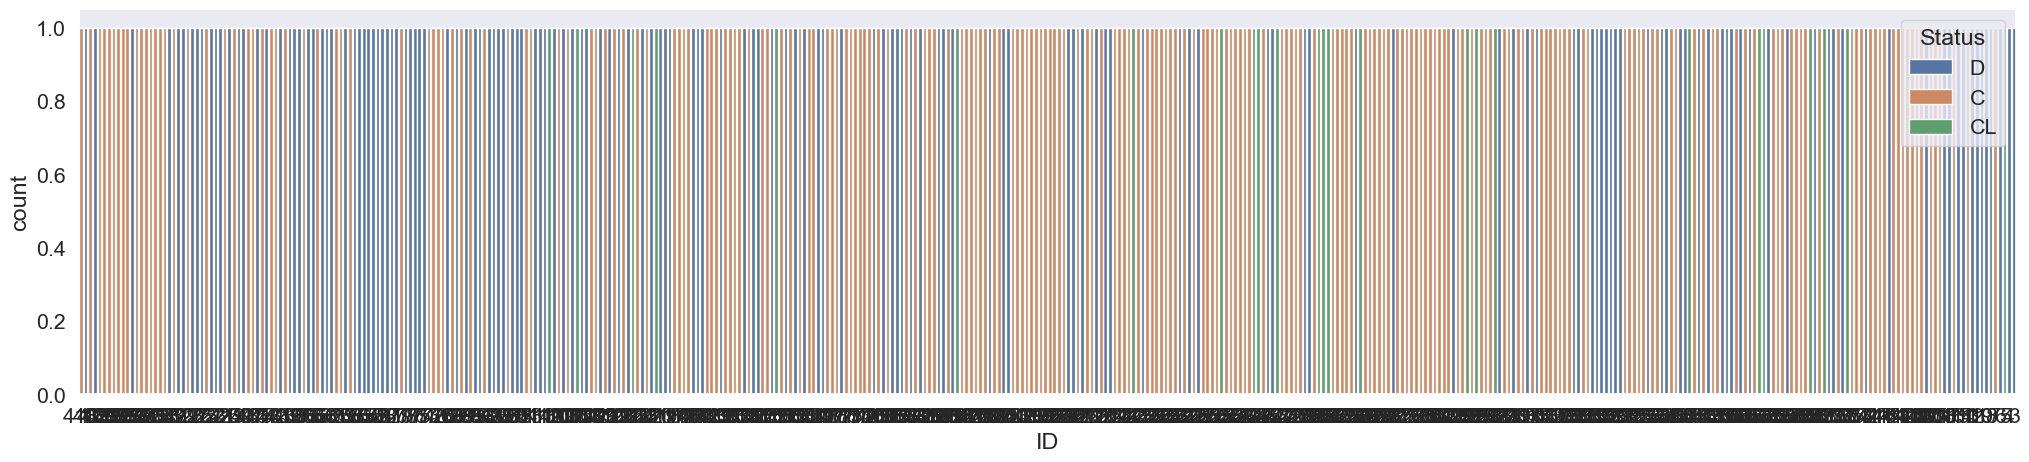

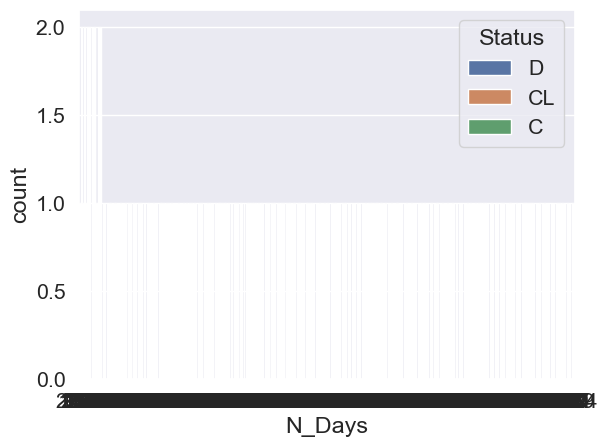

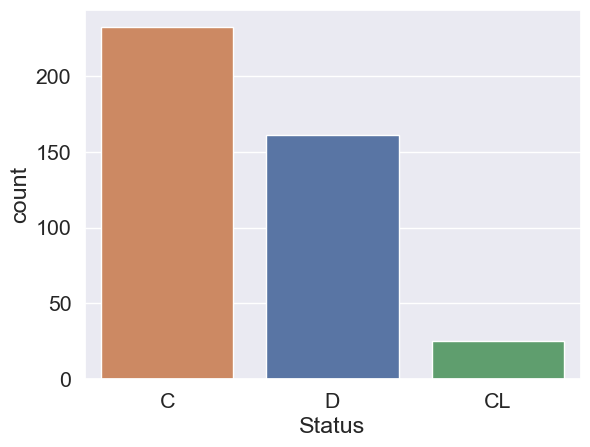

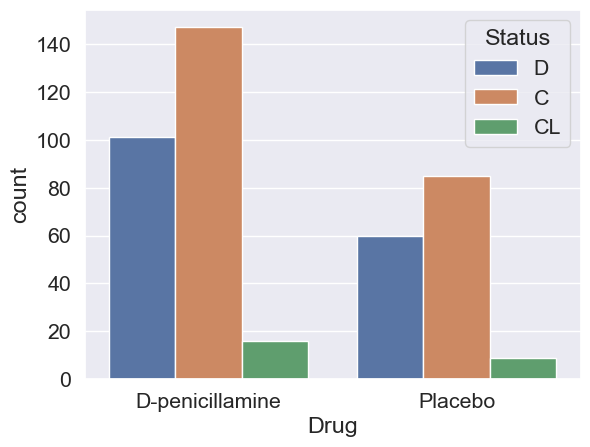

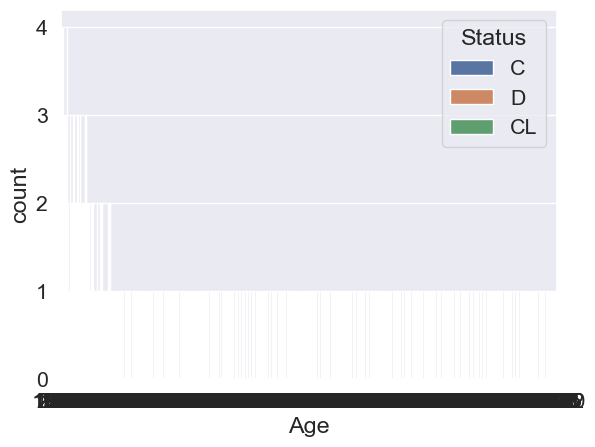

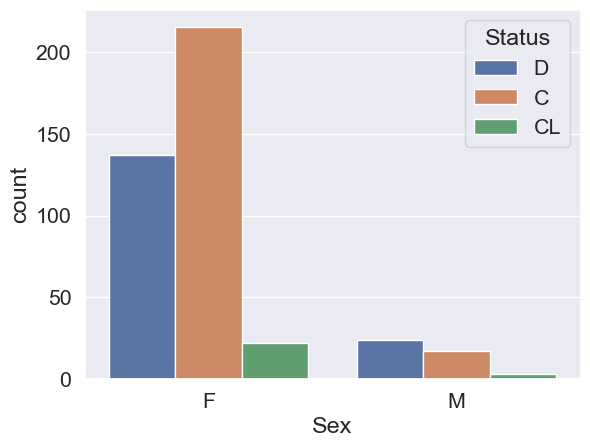

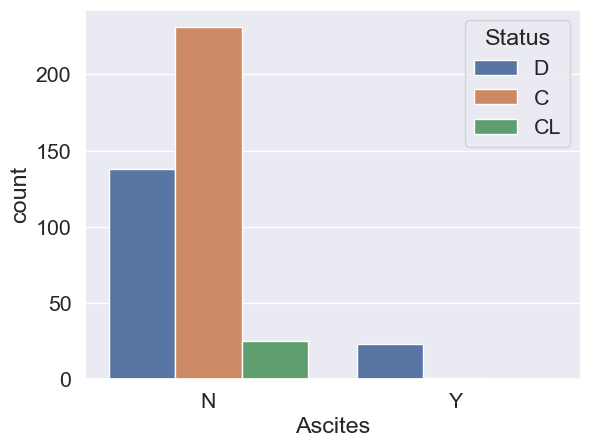

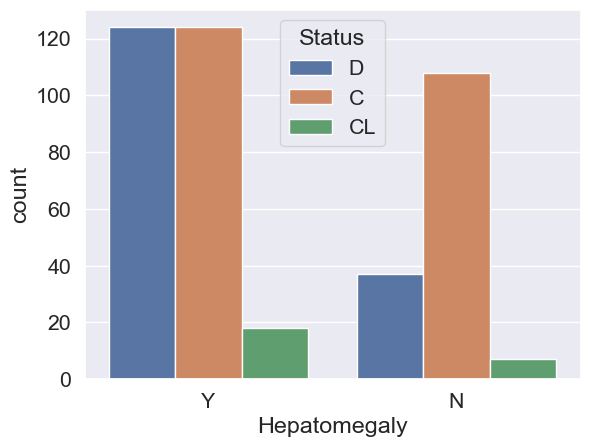

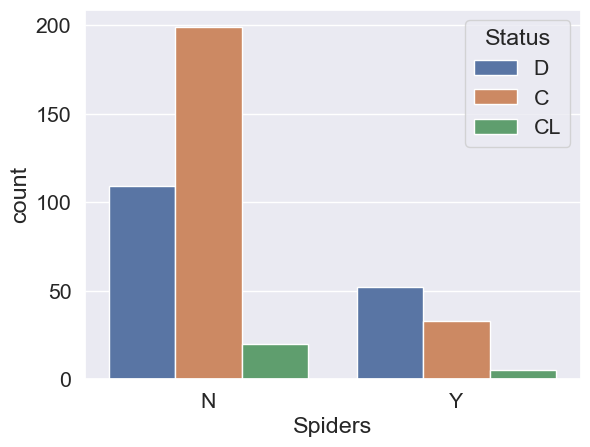

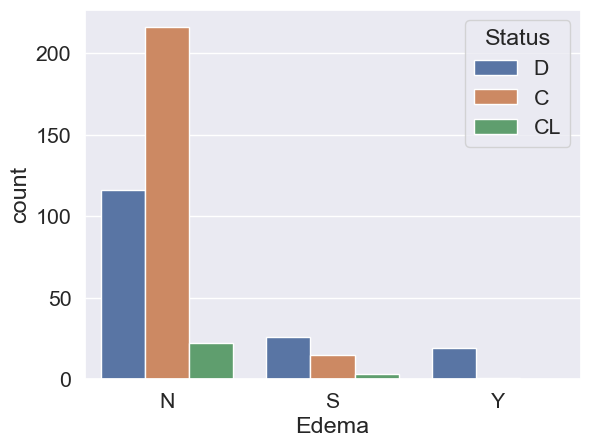

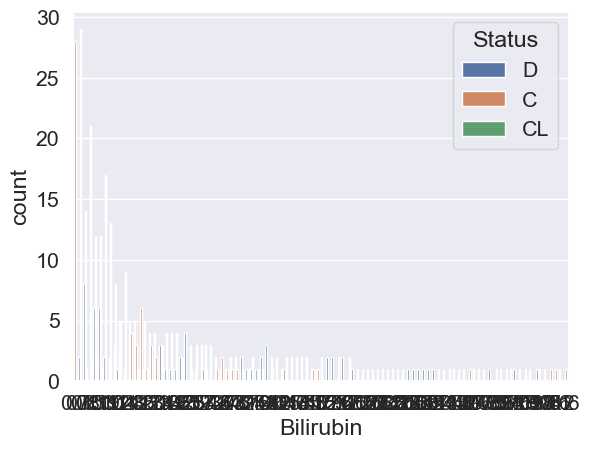

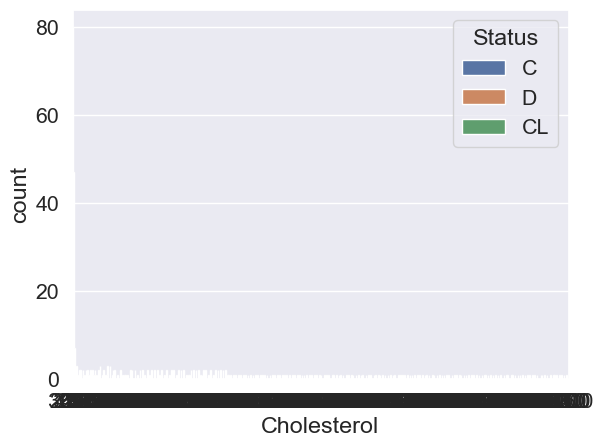

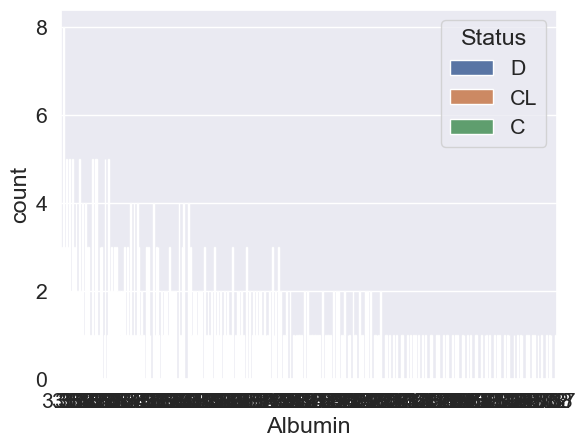

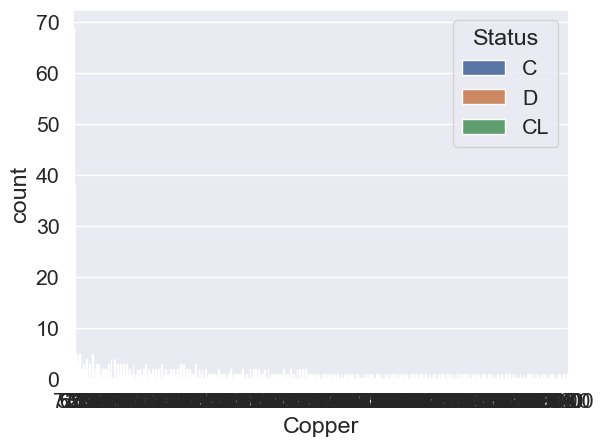

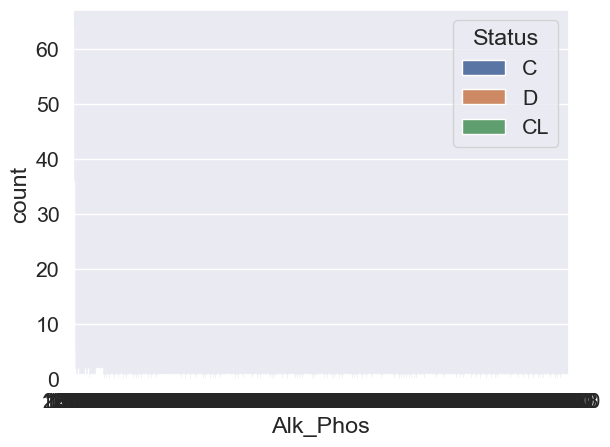

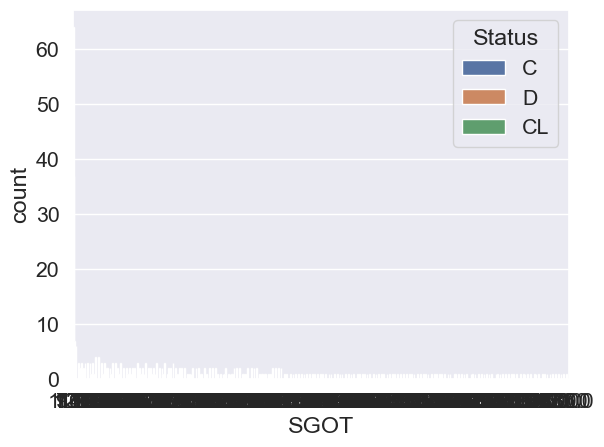

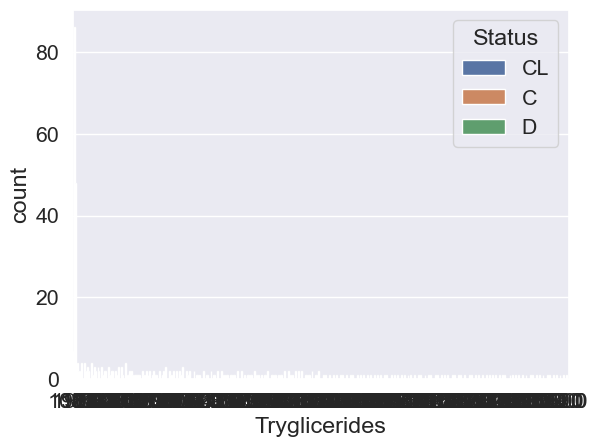

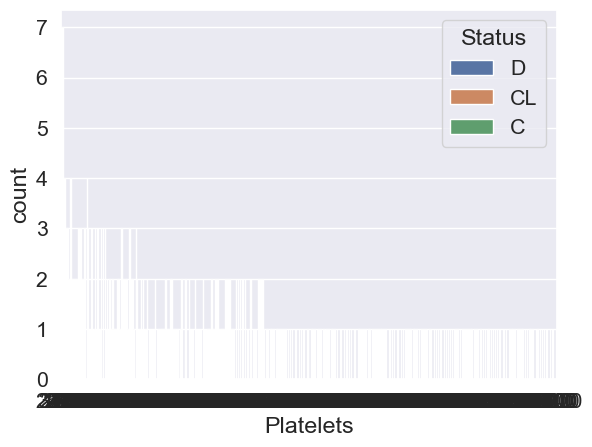

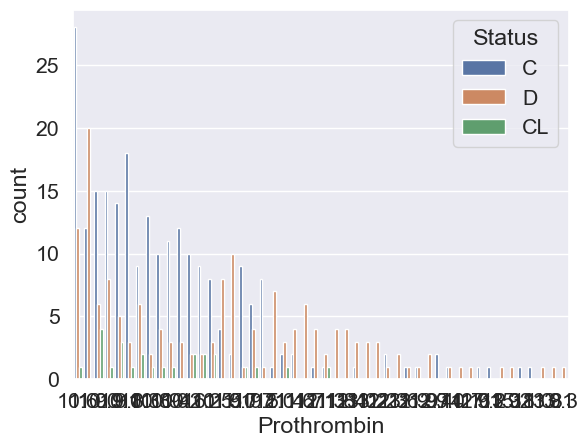

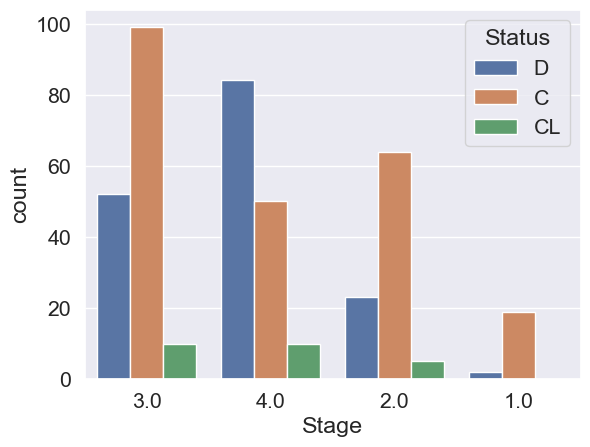

In [53]:
plt.subplots(figsize = (25,5))
for col in dataset.columns:
  sns.countplot(x=dataset[col],order=dataset[col].value_counts().index,hue=dataset['Status'])
  plt.show()

In [54]:
categorical_col = []
for column in dataset.columns:
     if dataset[column].dtype == object and len(dataset[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {dataset[column].unique()}")
        print("")

Status : ['D' 'C' 'CL']

Drug : ['D-penicillamine' 'Placebo']

Sex : ['F' 'M']

Ascites : ['Y' 'N']

Hepatomegaly : ['Y' 'N']

Spiders : ['Y' 'N']

Edema : ['Y' 'N' 'S']



In [55]:
Status       = {'D':1, 'C':2, 'CL':3}
Drug         = {'D-penicillamine':1, 'Placebo':2}
Sex          = {'F':1, 'M':2}
Ascites      = {'Y':1, 'N':2}
Hepatomegaly = {'Y':1, 'N':2}
Spiders      = {'Y':1, 'N':2}
Edema        = {'Y':1, 'N':2, 'S':3}

dataset['Status'] = dataset['Status'].map(Status)
dataset['Drug'] = dataset['Drug'].map(Drug)
dataset['Sex'] = dataset['Sex'].map(Sex)
dataset['Ascites'] = dataset['Ascites'].map(Ascites)
dataset['Hepatomegaly'] = dataset['Hepatomegaly'].map(Hepatomegaly)
dataset['Spiders'] = dataset['Spiders'].map(Spiders)
dataset['Edema'] = dataset['Edema'].map(Edema)

In [56]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    int64  
 3   Drug           418 non-null    int64  
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    int64  
 6   Ascites        418 non-null    int64  
 7   Hepatomegaly   418 non-null    int64  
 8   Spiders        418 non-null    int64  
 9   Edema          418 non-null    int64  
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    418 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         418 non-null    float64
 14  Alk_Phos       418 non-null    float64
 15  SGOT           418 non-null    float64
 16  Tryglicerides  418 non-null    float64
 17  Platelets      418 non-null    float64
 18  Prothrombi

In [57]:
dataset.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,1,1,21464,1,1,1,1,1,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,2,1,20617,1,2,1,1,2,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,1,1,25594,2,2,2,2,3,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,1,1,19994,1,2,1,1,3,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,3,2,13918,1,2,1,1,2,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [58]:
dataset.loc[:, dataset.isnull().any()].columns

Index([], dtype='object')

In [59]:
dataset.loc[:, dataset.isnull().any()].columns

Index([], dtype='object')

In [60]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    int64  
 3   Drug           418 non-null    int64  
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    int64  
 6   Ascites        418 non-null    int64  
 7   Hepatomegaly   418 non-null    int64  
 8   Spiders        418 non-null    int64  
 9   Edema          418 non-null    int64  
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    418 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         418 non-null    float64
 14  Alk_Phos       418 non-null    float64
 15  SGOT           418 non-null    float64
 16  Tryglicerides  418 non-null    float64
 17  Platelets      418 non-null    float64
 18  Prothrombi

In [61]:
dataset['Bilirubin'] = dataset['Bilirubin'].astype(float).astype(np.int64)
dataset['Cholesterol'] = dataset['Cholesterol'].astype(float).astype(np.int64)
dataset['Albumin'] = dataset['Albumin'].astype(float).astype(np.int64)
dataset['Copper'] = dataset['Copper'].astype(float).astype(np.int64)
dataset['Alk_Phos'] = dataset['Alk_Phos'].astype(float).astype(np.int64)
dataset['SGOT'] = dataset['SGOT'].astype(float).astype(np.int64)
dataset['Tryglicerides'] = dataset['Tryglicerides'].astype(float).astype(np.int64)
dataset['Platelets'] = dataset['Platelets'].astype(float).astype(np.int64)
dataset['Prothrombin'] = dataset['Prothrombin'].astype(float).astype(np.int64)
dataset['Stage'] = dataset['Stage'].astype(float).astype(np.int64)

In [62]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   ID             418 non-null    int64
 1   N_Days         418 non-null    int64
 2   Status         418 non-null    int64
 3   Drug           418 non-null    int64
 4   Age            418 non-null    int64
 5   Sex            418 non-null    int64
 6   Ascites        418 non-null    int64
 7   Hepatomegaly   418 non-null    int64
 8   Spiders        418 non-null    int64
 9   Edema          418 non-null    int64
 10  Bilirubin      418 non-null    int64
 11  Cholesterol    418 non-null    int64
 12  Albumin        418 non-null    int64
 13  Copper         418 non-null    int64
 14  Alk_Phos       418 non-null    int64
 15  SGOT           418 non-null    int64
 16  Tryglicerides  418 non-null    int64
 17  Platelets      418 non-null    int64
 18  Prothrombin    418 non-null    int64
 19  Stage   

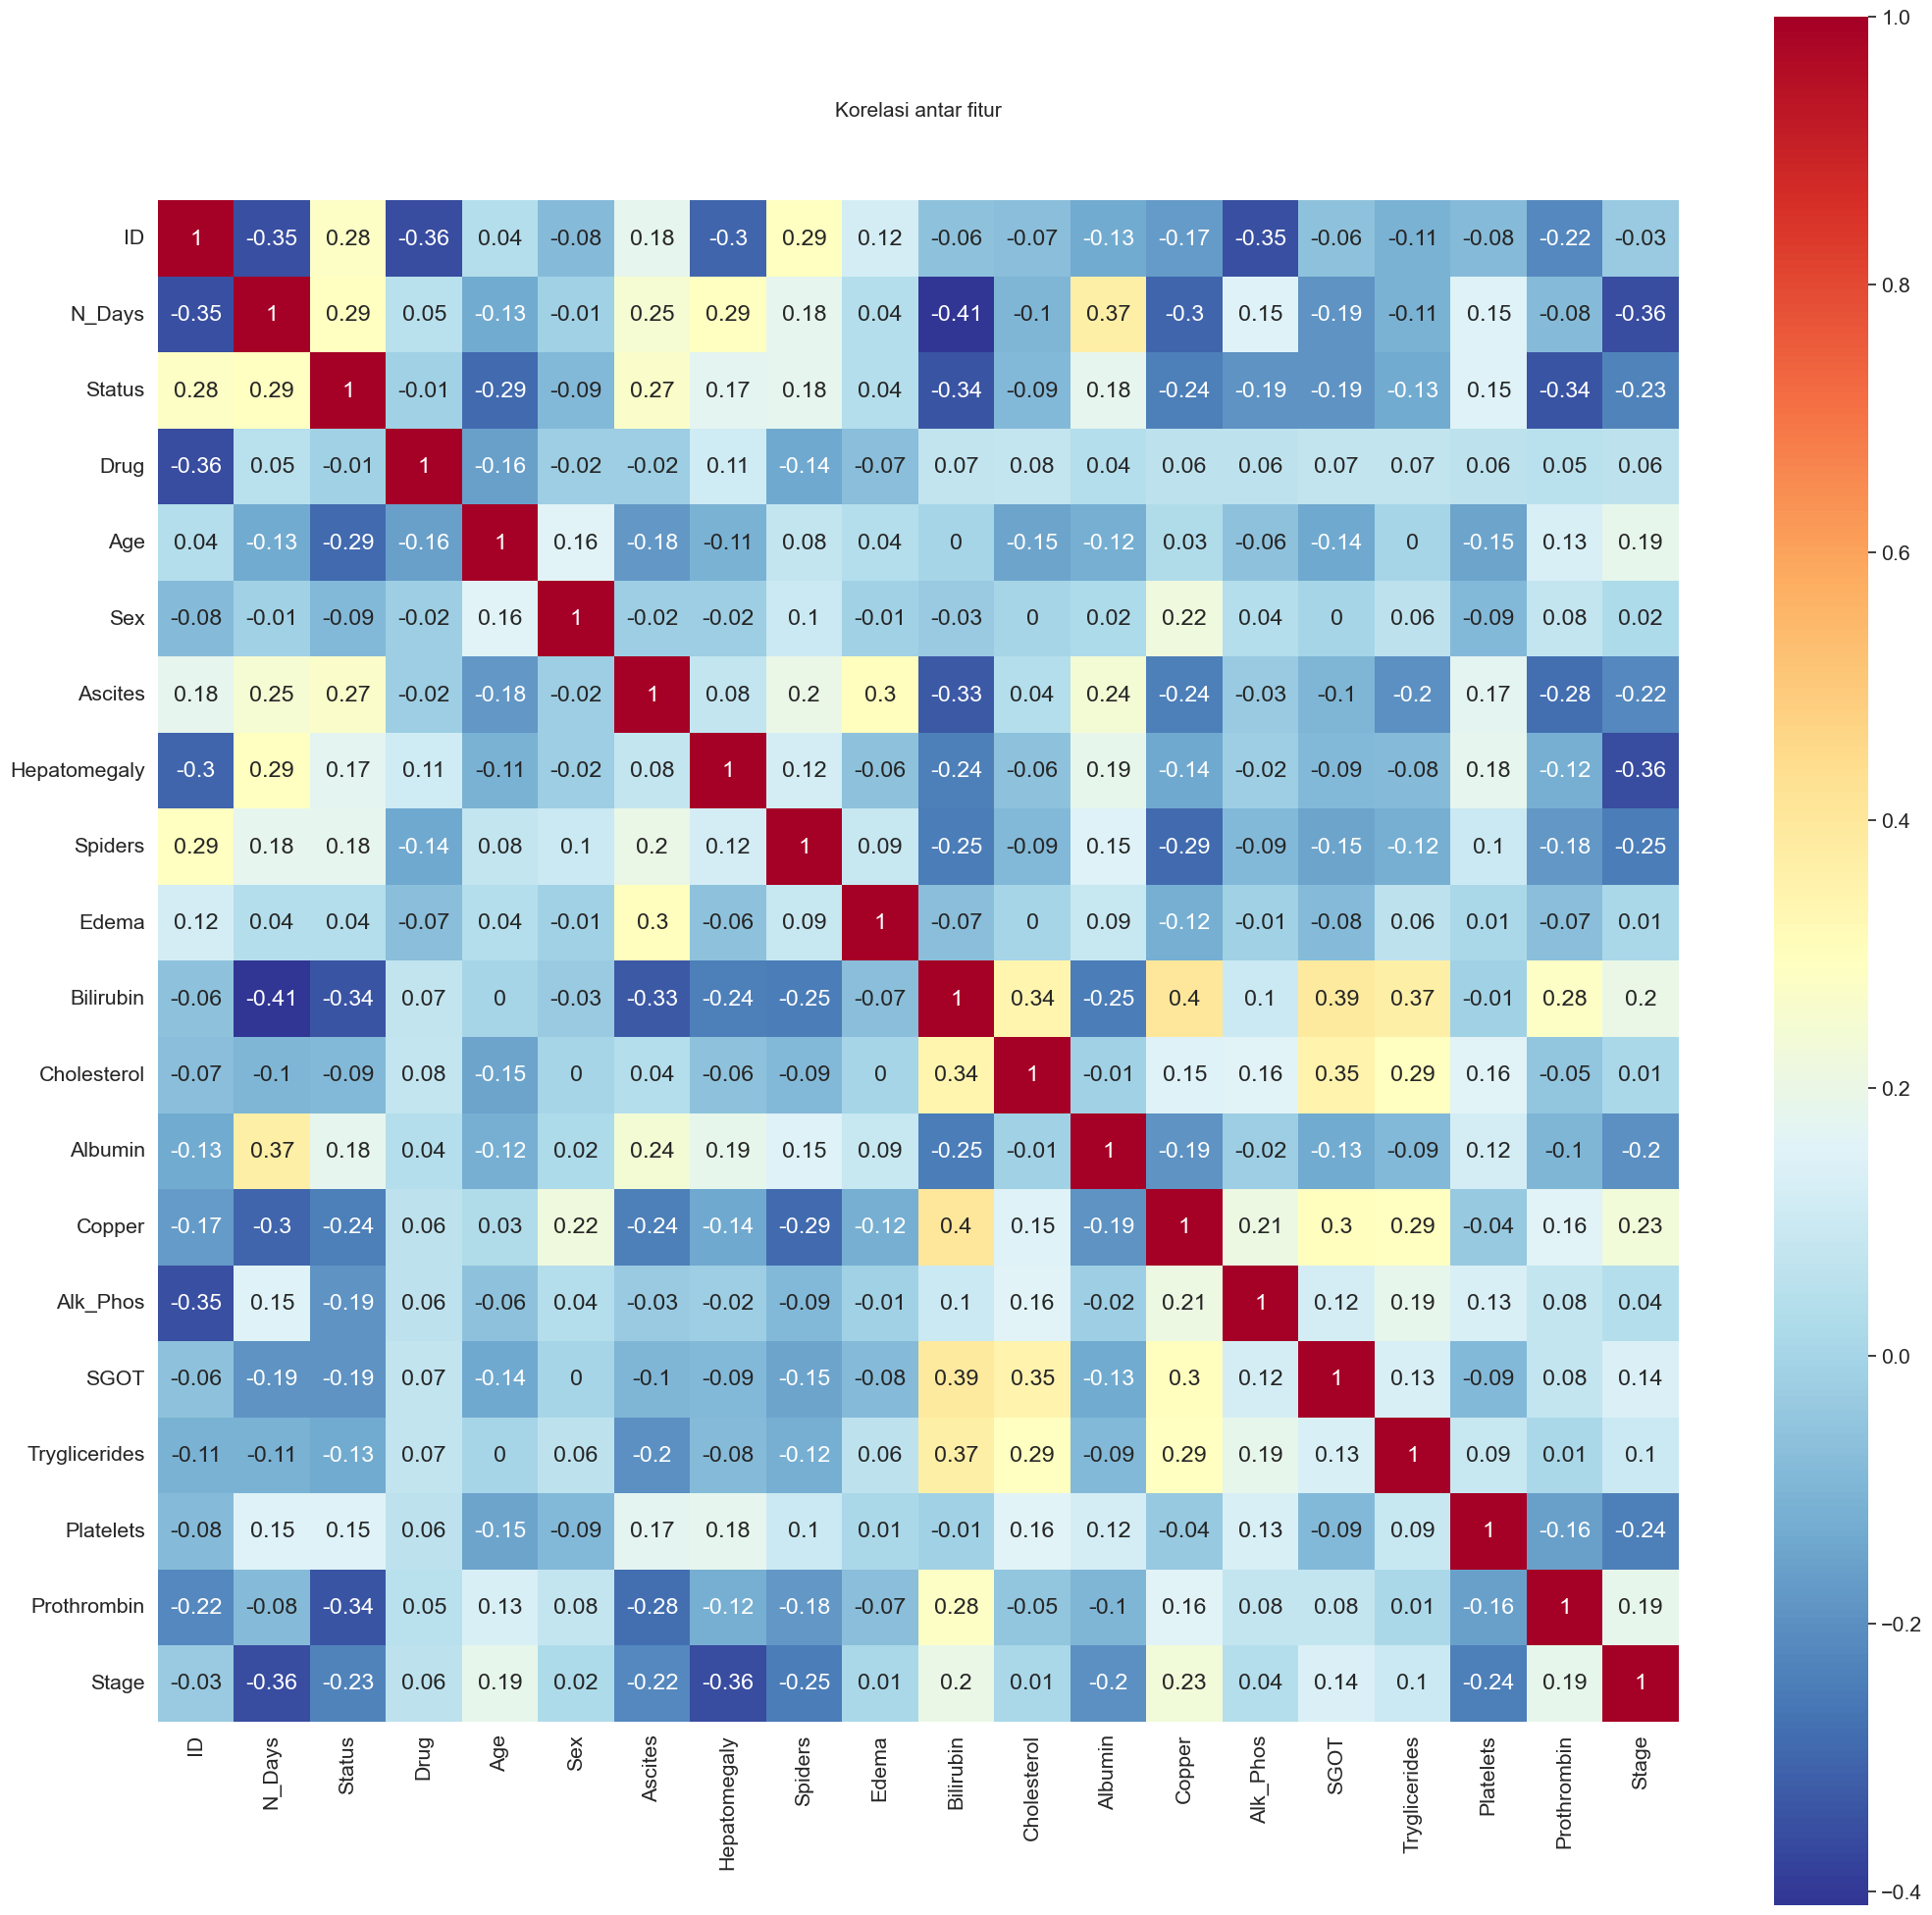

In [63]:
correlation = dataset.corr()
plt.subplots(figsize = (25,25))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlBu_r')
plt.title('Korelasi antar fitur', y=1.05, size=15)
plt.show()

In [64]:
dataset.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,1,1,21464,1,1,1,1,1,14,261,2,156,1718,137,172,190,12,4
1,2,4500,2,1,20617,1,2,1,1,2,1,302,4,54,7394,113,88,221,10,3
2,3,1012,1,1,25594,2,2,2,2,3,1,176,3,210,516,96,55,151,12,4
3,4,1925,1,1,19994,1,2,1,1,3,1,244,2,64,6121,60,92,183,10,4
4,5,1504,3,2,13918,1,2,1,1,2,3,279,3,143,671,113,72,136,10,3


In [65]:
X = dataset.drop(columns=['Status'])

In [66]:
X

,ID,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,1,21464,1,1,1,1,1,14,261,2,156,1718,137,172,190,12,4
1,2,4500,1,20617,1,2,1,1,2,1,302,4,54,7394,113,88,221,10,3
2,3,1012,1,25594,2,2,2,2,3,1,176,3,210,516,96,55,151,12,4
3,4,1925,1,19994,1,2,1,1,3,1,244,2,64,6121,60,92,183,10,4
4,5,1504,2,13918,1,2,1,1,2,3,279,3,143,671,113,72,136,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,1,24472,1,2,1,2,2,1,309,2,73,1259,114,108,174,10,3
414,415,1103,1,14245,1,2,1,2,2,0,309,3,73,1259,114,108,180,11,4
415,416,1055,1,20819,1,2,1,2,2,1,309,3,73,1259,114,108,143,9,3
416,417,691,1,21185,1,2,1,2,2,0,309,3,73,1259,114,108,269,10,3


In [67]:
Y = dataset['Status']

In [68]:
Y

0      1
1      2
2      1
3      1
4      3
      ..
413    1
414    2
415    2
416    2
417    2
Name: Status, Length: 418, dtype: int64

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=42)

In [70]:
X_train

,ID,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
110,111,2350,1,15031,1,2,2,2,2,5,528,4,77,2404,172,78,467,10,3
290,291,901,1,14939,1,2,2,2,2,3,339,3,123,3336,205,84,304,9,4
73,74,1827,1,18964,1,2,1,1,2,8,558,3,280,967,89,309,278,11,4
261,262,1666,2,15628,1,2,1,2,2,2,322,3,65,2562,91,209,231,9,3
365,366,249,1,22280,1,2,1,2,2,1,309,3,73,1259,114,108,223,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,72,4184,2,11868,1,2,2,2,2,0,320,3,51,1243,122,80,225,10,3
106,107,3388,2,22836,1,2,2,2,2,0,212,4,10,648,71,77,316,17,1
270,271,1569,2,18435,1,2,1,2,2,1,321,3,94,955,111,177,289,9,3
348,349,2855,1,19724,1,2,1,2,2,1,309,3,73,1259,114,108,249,10,2


In [71]:
parameters_dt = {
                "model__max_depth": np.arange(1,10),
                "model__min_samples_leaf": np.arange(1,10),
                "model__min_samples_split": np.arange(2,11),
                "model__criterion": ['gini','entropy'],
                "model__random_state": [42]
}

In [72]:
classifier_dt_pipeline = Pipeline([
                          ('model',DecisionTreeClassifier()),
                          ])

In [73]:
ori_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)

In [74]:
ori_classifier_dt.fit(X_train,Y_train.to_numpy())

d:\kuliah\folder kuliah_AriqRasyaEkaMaulana\ProKom_Ariq\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'model__min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'model__random_state': [42]})

In [75]:
ori_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(max_depth=np.int64(4),
                                        min_samples_leaf=np.int64(6),
                                        min_samples_split=np.int64(2),
                                        random_state=42))])

In [76]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,ori_classifier_dt.best_params_[param_name]))

model__criterion: 'gini'
model__max_depth: np.int64(4)
model__min_samples_leaf: np.int64(6)
model__min_samples_split: np.int64(2)
model__random_state: 42


In [77]:
ori_y_pred_dt_train = ori_classifier_dt.predict(X_train)

ori_accuracy_dt_train = accuracy_score(Y_train,ori_y_pred_dt_train)
print('Akurasi pada training set: ', ori_accuracy_dt_train)

ori_precision_dt_train = precision_score(Y_train,ori_y_pred_dt_train, average='micro')
print('Precision pada training set: ', ori_precision_dt_train)

ori_recall_dt_train = recall_score(Y_train,ori_y_pred_dt_train, average='micro')
print('Recall pada training set: ', ori_recall_dt_train)

ori_y_pred_dt_test = ori_classifier_dt.predict(X_test)

ori_accuracy_dt_test = accuracy_score(Y_test,ori_y_pred_dt_test)
print('Akurasi pada test set: ', ori_accuracy_dt_test)

ori_precision_dt_test = precision_score(Y_test,ori_y_pred_dt_test, average='micro')
print('Precision pada test set: ', ori_precision_dt_test)

ori_recall_dt_test = recall_score(Y_test,ori_y_pred_dt_test, average='micro')
print('Recall pada test set: ', ori_recall_dt_test)

Akurasi pada training set:  0.8404255319148937
Precision pada training set:  0.8404255319148937
Recall pada training set:  0.8404255319148937
Akurasi pada test set:  0.8333333333333334
Precision pada test set:  0.8333333333333334
Recall pada test set:  0.8333333333333334


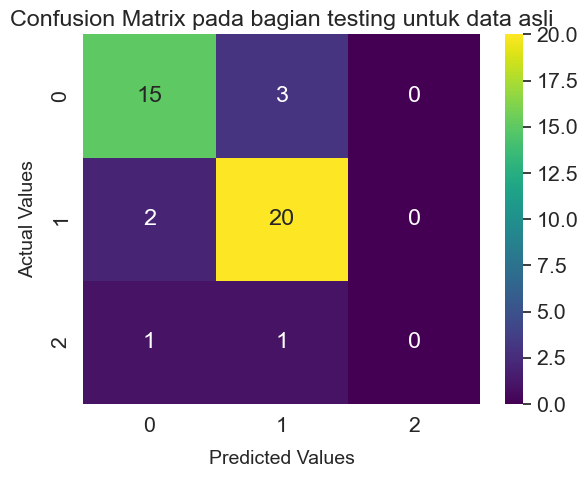

In [78]:
sns.heatmap(confusion_matrix(Y_test,ori_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

RAHHHHHHHHHHHH 